# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 26478 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.all, max_distance=1)


  0% (    1 of 26478) |          | Elapsed Time: 0:00:35 ETA:  10 days, 22:54:36

  0% (   56 of 26478) |                    | Elapsed Time: 0:00:36 ETA:  0:07:31

  0% (  109 of 26478) |                    | Elapsed Time: 0:00:37 ETA:  0:07:40

  0% (  161 of 26478) |                    | Elapsed Time: 0:00:38 ETA:  0:07:46

  0% (  209 of 26478) |                    | Elapsed Time: 0:00:39 ETA:  0:07:56

  0% (  258 of 26478) |                    | Elapsed Time: 0:00:40 ETA:  0:08:00

  1% (  307 of 26478) |                    | Elapsed Time: 0:00:41 ETA:  0:08:04

  1% (  331 of 26478) |                    | Elapsed Time: 0:00:42 ETA:  0:08:05

  1% (  383 of 26478) |                    | Elapsed Time: 0:00:43 ETA:  0:08:01

  1% (  433 of 26478) |                    | Elapsed Time: 0:00:44 ETA:  0:08:02

  1% (  487 of 26478) |                    | Elapsed Time: 0:00:45 ETA:  0:08:02

  2% (  543 of 26478) |                    | Elapsed Time: 0:00:46 ETA:  0:07:57

  2% (  595 of 26478) |                    | Elapsed Time: 0:00:47 ETA:  0:07:55

  2% (  649 of 26478) |                    | Elapsed Time: 0:00:48 ETA:  0:07:47

  2% (  662 of 26478) |                    | Elapsed Time: 0:00:48 ETA:  0:07:43

  2% (  716 of 26478) |                    | Elapsed Time: 0:00:49 ETA:  0:07:37

  2% (  770 of 26478) |                    | Elapsed Time: 0:00:50 ETA:  0:07:32

  3% (  825 of 26478) |                    | Elapsed Time: 0:00:51 ETA:  0:07:27

  3% (  880 of 26478) |                    | Elapsed Time: 0:00:52 ETA:  0:07:20

  3% (  933 of 26478) |                    | Elapsed Time: 0:00:53 ETA:  0:07:21

  3% (  993 of 26478) |                    | Elapsed Time: 0:00:54 ETA:  0:07:16

  3% ( 1044 of 26478) |                    | Elapsed Time: 0:00:55 ETA:  0:07:19

  4% ( 1095 of 26478) |                    | Elapsed Time: 0:00:57 ETA:  0:08:18

  4% ( 1150 of 26478) |                    | Elapsed Time: 0:00:58 ETA:  0:08:15

  4% ( 1204 of 26478) |                    | Elapsed Time: 0:00:59 ETA:  0:08:15

  4% ( 1253 of 26478) |                    | Elapsed Time: 0:01:00 ETA:  0:08:22

  4% ( 1300 of 26478) |                    | Elapsed Time: 0:01:01 ETA:  0:08:31

  5% ( 1324 of 26478) |#                   | Elapsed Time: 0:01:02 ETA:  0:08:39

  5% ( 1371 of 26478) |#                   | Elapsed Time: 0:01:03 ETA:  0:08:53

  5% ( 1417 of 26478) |#                   | Elapsed Time: 0:01:04 ETA:  0:08:52

  5% ( 1463 of 26478) |#                   | Elapsed Time: 0:01:05 ETA:  0:08:57

  5% ( 1509 of 26478) |#                   | Elapsed Time: 0:01:06 ETA:  0:08:02

  5% ( 1556 of 26478) |#                   | Elapsed Time: 0:01:07 ETA:  0:08:13

  6% ( 1602 of 26478) |#                   | Elapsed Time: 0:01:08 ETA:  0:08:22

  6% ( 1655 of 26478) |#                   | Elapsed Time: 0:01:09 ETA:  0:08:20

  6% ( 1706 of 26478) |#                   | Elapsed Time: 0:01:10 ETA:  0:08:14

  6% ( 1759 of 26478) |#                   | Elapsed Time: 0:01:11 ETA:  0:08:05

  6% ( 1813 of 26478) |#                   | Elapsed Time: 0:01:12 ETA:  0:07:52

  7% ( 1863 of 26478) |#                   | Elapsed Time: 0:01:13 ETA:  0:07:47

  7% ( 1917 of 26478) |#                   | Elapsed Time: 0:01:14 ETA:  0:07:36

  7% ( 1969 of 26478) |#                   | Elapsed Time: 0:01:15 ETA:  0:07:28

  7% ( 1986 of 26478) |#                   | Elapsed Time: 0:01:15 ETA:  0:07:19

  7% ( 2039 of 26478) |#                   | Elapsed Time: 0:01:16 ETA:  0:07:14

  7% ( 2093 of 26478) |#                   | Elapsed Time: 0:01:17 ETA:  0:07:11

  8% ( 2148 of 26478) |#                   | Elapsed Time: 0:01:18 ETA:  0:07:05

  8% ( 2202 of 26478) |#                   | Elapsed Time: 0:01:19 ETA:  0:07:02

  8% ( 2256 of 26478) |#                   | Elapsed Time: 0:01:20 ETA:  0:07:00

  8% ( 2317 of 26478) |#                   | Elapsed Time: 0:01:22 ETA:  0:06:55

  8% ( 2367 of 26478) |#                   | Elapsed Time: 0:01:23 ETA:  0:06:56

  9% ( 2416 of 26478) |#                   | Elapsed Time: 0:01:24 ETA:  0:07:01

  9% ( 2469 of 26478) |#                   | Elapsed Time: 0:01:25 ETA:  0:07:00

  9% ( 2517 of 26478) |#                   | Elapsed Time: 0:01:26 ETA:  0:07:06

  9% ( 2569 of 26478) |#                   | Elapsed Time: 0:01:27 ETA:  0:07:08

  9% ( 2622 of 26478) |#                   | Elapsed Time: 0:01:28 ETA:  0:07:09

 10% ( 2648 of 26478) |##                  | Elapsed Time: 0:01:28 ETA:  0:07:13

 10% ( 2699 of 26478) |##                  | Elapsed Time: 0:01:29 ETA:  0:07:16

 10% ( 2748 of 26478) |##                  | Elapsed Time: 0:01:30 ETA:  0:07:17

 10% ( 2799 of 26478) |##                  | Elapsed Time: 0:01:31 ETA:  0:07:14

 10% ( 2855 of 26478) |##                  | Elapsed Time: 0:01:32 ETA:  0:07:06

 10% ( 2907 of 26478) |##                  | Elapsed Time: 0:01:33 ETA:  0:07:06

 11% ( 2959 of 26478) |##                  | Elapsed Time: 0:01:34 ETA:  0:07:00

 11% ( 2979 of 26478) |##                  | Elapsed Time: 0:01:35 ETA:  0:07:01

 11% ( 3030 of 26478) |##                  | Elapsed Time: 0:01:36 ETA:  0:07:02

 11% ( 3082 of 26478) |##                  | Elapsed Time: 0:01:37 ETA:  0:06:59

 11% ( 3134 of 26478) |##                  | Elapsed Time: 0:01:38 ETA:  0:06:56

 12% ( 3178 of 26478) |##                  | Elapsed Time: 0:01:39 ETA:  0:07:02

 12% ( 3229 of 26478) |##                  | Elapsed Time: 0:01:40 ETA:  0:07:01

 12% ( 3280 of 26478) |##                  | Elapsed Time: 0:01:41 ETA:  0:07:05

 12% ( 3310 of 26478) |##                  | Elapsed Time: 0:01:41 ETA:  0:07:11

 12% ( 3359 of 26478) |##                  | Elapsed Time: 0:01:42 ETA:  0:07:14

 12% ( 3406 of 26478) |##                  | Elapsed Time: 0:01:43 ETA:  0:07:17

 13% ( 3453 of 26478) |##                  | Elapsed Time: 0:01:44 ETA:  0:07:20

 13% ( 3504 of 26478) |##                  | Elapsed Time: 0:01:45 ETA:  0:07:21

 13% ( 3553 of 26478) |##                  | Elapsed Time: 0:01:46 ETA:  0:07:25

 13% ( 3603 of 26478) |##                  | Elapsed Time: 0:01:47 ETA:  0:07:15

 13% ( 3641 of 26478) |##                  | Elapsed Time: 0:01:48 ETA:  0:07:17

 13% ( 3686 of 26478) |##                  | Elapsed Time: 0:01:49 ETA:  0:07:24

 14% ( 3736 of 26478) |##                  | Elapsed Time: 0:01:50 ETA:  0:07:18

 14% ( 3785 of 26478) |##                  | Elapsed Time: 0:01:51 ETA:  0:07:18

 14% ( 3836 of 26478) |##                  | Elapsed Time: 0:01:52 ETA:  0:07:12

 14% ( 3887 of 26478) |##                  | Elapsed Time: 0:01:53 ETA:  0:07:07

 14% ( 3938 of 26478) |##                  | Elapsed Time: 0:01:54 ETA:  0:07:06

 15% ( 3972 of 26478) |###                 | Elapsed Time: 0:01:55 ETA:  0:07:03

 15% ( 4022 of 26478) |###                 | Elapsed Time: 0:01:56 ETA:  0:07:02

 15% ( 4074 of 26478) |###                 | Elapsed Time: 0:01:57 ETA:  0:06:58

 15% ( 4124 of 26478) |###                 | Elapsed Time: 0:01:58 ETA:  0:06:52

 15% ( 4168 of 26478) |###                 | Elapsed Time: 0:01:59 ETA:  0:06:57

 15% ( 4219 of 26478) |###                 | Elapsed Time: 0:02:00 ETA:  0:06:54

 16% ( 4256 of 26478) |###                 | Elapsed Time: 0:02:02 ETA:  0:08:14

 16% ( 4303 of 26478) |###                 | Elapsed Time: 0:02:03 ETA:  0:08:15

 16% ( 4353 of 26478) |###                 | Elapsed Time: 0:02:04 ETA:  0:08:15

 16% ( 4403 of 26478) |###                 | Elapsed Time: 0:02:05 ETA:  0:08:11

 16% ( 4451 of 26478) |###                 | Elapsed Time: 0:02:06 ETA:  0:08:13

 17% ( 4502 of 26478) |###                 | Elapsed Time: 0:02:07 ETA:  0:08:13

 17% ( 4555 of 26478) |###                 | Elapsed Time: 0:02:08 ETA:  0:08:07

 17% ( 4610 of 26478) |###                 | Elapsed Time: 0:02:09 ETA:  0:07:52

 17% ( 4634 of 26478) |###                 | Elapsed Time: 0:02:09 ETA:  0:07:53

 17% ( 4686 of 26478) |###                 | Elapsed Time: 0:02:10 ETA:  0:06:27

 17% ( 4737 of 26478) |###                 | Elapsed Time: 0:02:11 ETA:  0:06:26

 18% ( 4791 of 26478) |###                 | Elapsed Time: 0:02:12 ETA:  0:06:20

 18% ( 4844 of 26478) |###                 | Elapsed Time: 0:02:13 ETA:  0:06:16

 18% ( 4896 of 26478) |###                 | Elapsed Time: 0:02:14 ETA:  0:06:11

 18% ( 4945 of 26478) |###                 | Elapsed Time: 0:02:15 ETA:  0:06:13

 18% ( 4965 of 26478) |###                 | Elapsed Time: 0:02:16 ETA:  0:06:13

 18% ( 5013 of 26478) |###                 | Elapsed Time: 0:02:17 ETA:  0:06:20

 19% ( 5067 of 26478) |###                 | Elapsed Time: 0:02:18 ETA:  0:06:18

 19% ( 5120 of 26478) |###                 | Elapsed Time: 0:02:19 ETA:  0:06:17

 19% ( 5174 of 26478) |###                 | Elapsed Time: 0:02:20 ETA:  0:06:12

 19% ( 5230 of 26478) |###                 | Elapsed Time: 0:02:21 ETA:  0:06:09

 19% ( 5283 of 26478) |###                 | Elapsed Time: 0:02:22 ETA:  0:06:08

 20% ( 5296 of 26478) |####                | Elapsed Time: 0:02:22 ETA:  0:06:06

 20% ( 5353 of 26478) |####                | Elapsed Time: 0:02:23 ETA:  0:05:55

 20% ( 5407 of 26478) |####                | Elapsed Time: 0:02:24 ETA:  0:05:54

 20% ( 5460 of 26478) |####                | Elapsed Time: 0:02:25 ETA:  0:05:46

 20% ( 5513 of 26478) |####                | Elapsed Time: 0:02:26 ETA:  0:05:47

 21% ( 5567 of 26478) |####                | Elapsed Time: 0:02:27 ETA:  0:05:45

 21% ( 5627 of 26478) |####                | Elapsed Time: 0:02:28 ETA:  0:05:42

 21% ( 5681 of 26478) |####                | Elapsed Time: 0:02:29 ETA:  0:05:40

 21% ( 5735 of 26478) |####                | Elapsed Time: 0:02:30 ETA:  0:05:39

 21% ( 5788 of 26478) |####                | Elapsed Time: 0:02:31 ETA:  0:05:43

 22% ( 5840 of 26478) |####                | Elapsed Time: 0:02:32 ETA:  0:05:44

 22% ( 5892 of 26478) |####                | Elapsed Time: 0:02:33 ETA:  0:05:45

 22% ( 5958 of 26478) |####                | Elapsed Time: 0:02:34 ETA:  0:05:39

 22% ( 6012 of 26478) |####                | Elapsed Time: 0:02:35 ETA:  0:05:42

 22% ( 6067 of 26478) |####                | Elapsed Time: 0:02:36 ETA:  0:05:41

 23% ( 6122 of 26478) |####                | Elapsed Time: 0:02:37 ETA:  0:05:38

 23% ( 6178 of 26478) |####                | Elapsed Time: 0:02:38 ETA:  0:05:35

 23% ( 6232 of 26478) |####                | Elapsed Time: 0:02:39 ETA:  0:05:33

 23% ( 6289 of 26478) |####                | Elapsed Time: 0:02:41 ETA:  0:05:28

 23% ( 6345 of 26478) |####                | Elapsed Time: 0:02:42 ETA:  0:05:27

 24% ( 6400 of 26478) |####                | Elapsed Time: 0:02:43 ETA:  0:05:27

 24% ( 6453 of 26478) |####                | Elapsed Time: 0:02:44 ETA:  0:05:27

 24% ( 6504 of 26478) |####                | Elapsed Time: 0:02:45 ETA:  0:05:29

 24% ( 6556 of 26478) |####                | Elapsed Time: 0:02:46 ETA:  0:05:32

 24% ( 6609 of 26478) |####                | Elapsed Time: 0:02:47 ETA:  0:05:34

 25% ( 6620 of 26478) |#####               | Elapsed Time: 0:02:47 ETA:  0:05:38

 25% ( 6674 of 26478) |#####               | Elapsed Time: 0:02:48 ETA:  0:05:37

 25% ( 6728 of 26478) |#####               | Elapsed Time: 0:02:49 ETA:  0:05:34

 25% ( 6779 of 26478) |#####               | Elapsed Time: 0:02:50 ETA:  0:05:39

 25% ( 6830 of 26478) |#####               | Elapsed Time: 0:02:51 ETA:  0:05:42

 25% ( 6884 of 26478) |#####               | Elapsed Time: 0:02:52 ETA:  0:05:40

 26% ( 6936 of 26478) |#####               | Elapsed Time: 0:02:53 ETA:  0:05:38

 26% ( 6951 of 26478) |#####               | Elapsed Time: 0:02:53 ETA:  0:05:36

 26% ( 7005 of 26478) |#####               | Elapsed Time: 0:02:54 ETA:  0:05:34

 26% ( 7058 of 26478) |#####               | Elapsed Time: 0:02:55 ETA:  0:05:30

 26% ( 7112 of 26478) |#####               | Elapsed Time: 0:02:56 ETA:  0:05:28

 27% ( 7166 of 26478) |#####               | Elapsed Time: 0:02:57 ETA:  0:05:27

 27% ( 7219 of 26478) |#####               | Elapsed Time: 0:02:58 ETA:  0:05:23

 27% ( 7269 of 26478) |#####               | Elapsed Time: 0:02:59 ETA:  0:05:23

 27% ( 7282 of 26478) |#####               | Elapsed Time: 0:03:00 ETA:  0:05:31

 27% ( 7329 of 26478) |#####               | Elapsed Time: 0:03:01 ETA:  0:05:36

 27% ( 7377 of 26478) |#####               | Elapsed Time: 0:03:02 ETA:  0:05:40

 28% ( 7422 of 26478) |#####               | Elapsed Time: 0:03:03 ETA:  0:05:51

 28% ( 7469 of 26478) |#####               | Elapsed Time: 0:03:04 ETA:  0:05:58

 28% ( 7514 of 26478) |#####               | Elapsed Time: 0:03:05 ETA:  0:06:09

 28% ( 7562 of 26478) |#####               | Elapsed Time: 0:03:06 ETA:  0:06:17

 28% ( 7613 of 26478) |#####               | Elapsed Time: 0:03:07 ETA:  0:06:31

 28% ( 7662 of 26478) |#####               | Elapsed Time: 0:03:08 ETA:  0:06:21

 29% ( 7711 of 26478) |#####               | Elapsed Time: 0:03:09 ETA:  0:06:17

 29% ( 7759 of 26478) |#####               | Elapsed Time: 0:03:10 ETA:  0:06:15

 29% ( 7808 of 26478) |#####               | Elapsed Time: 0:03:11 ETA:  0:06:08

 29% ( 7858 of 26478) |#####               | Elapsed Time: 0:03:12 ETA:  0:06:02

 29% ( 7909 of 26478) |#####               | Elapsed Time: 0:03:13 ETA:  0:05:53

 30% ( 7944 of 26478) |######              | Elapsed Time: 0:03:14 ETA:  0:05:47

 30% ( 7991 of 26478) |######              | Elapsed Time: 0:03:15 ETA:  0:05:44

 30% ( 8041 of 26478) |######              | Elapsed Time: 0:03:16 ETA:  0:05:43

 30% ( 8091 of 26478) |######              | Elapsed Time: 0:03:17 ETA:  0:05:42

 30% ( 8143 of 26478) |######              | Elapsed Time: 0:03:18 ETA:  0:05:38

 30% ( 8195 of 26478) |######              | Elapsed Time: 0:03:20 ETA:  0:07:09

 31% ( 8247 of 26478) |######              | Elapsed Time: 0:03:21 ETA:  0:07:04

 31% ( 8275 of 26478) |######              | Elapsed Time: 0:03:22 ETA:  0:07:08

 31% ( 8327 of 26478) |######              | Elapsed Time: 0:03:23 ETA:  0:07:05

 31% ( 8379 of 26478) |######              | Elapsed Time: 0:03:24 ETA:  0:07:00

 31% ( 8432 of 26478) |######              | Elapsed Time: 0:03:25 ETA:  0:06:51

 32% ( 8486 of 26478) |######              | Elapsed Time: 0:03:26 ETA:  0:06:44

 32% ( 8537 of 26478) |######              | Elapsed Time: 0:03:27 ETA:  0:06:41

 32% ( 8588 of 26478) |######              | Elapsed Time: 0:03:28 ETA:  0:06:41

 32% ( 8606 of 26478) |######              | Elapsed Time: 0:03:28 ETA:  0:05:04

 32% ( 8658 of 26478) |######              | Elapsed Time: 0:03:29 ETA:  0:05:03

 32% ( 8710 of 26478) |######              | Elapsed Time: 0:03:30 ETA:  0:05:01

 33% ( 8762 of 26478) |######              | Elapsed Time: 0:03:31 ETA:  0:05:00

 33% ( 8815 of 26478) |######              | Elapsed Time: 0:03:32 ETA:  0:04:58

 33% ( 8868 of 26478) |######              | Elapsed Time: 0:03:33 ETA:  0:04:57

 33% ( 8920 of 26478) |######              | Elapsed Time: 0:03:34 ETA:  0:04:59

 33% ( 8937 of 26478) |######              | Elapsed Time: 0:03:35 ETA:  0:04:58

 33% ( 8989 of 26478) |######              | Elapsed Time: 0:03:36 ETA:  0:04:55

 34% ( 9043 of 26478) |######              | Elapsed Time: 0:03:37 ETA:  0:04:52

 34% ( 9096 of 26478) |######              | Elapsed Time: 0:03:38 ETA:  0:04:50

 34% ( 9147 of 26478) |######              | Elapsed Time: 0:03:39 ETA:  0:04:50

 34% ( 9201 of 26478) |######              | Elapsed Time: 0:03:40 ETA:  0:04:48

 34% ( 9253 of 26478) |######              | Elapsed Time: 0:03:41 ETA:  0:04:47

 35% ( 9268 of 26478) |#######             | Elapsed Time: 0:03:41 ETA:  0:04:48

 35% ( 9321 of 26478) |#######             | Elapsed Time: 0:03:42 ETA:  0:04:46

 35% ( 9374 of 26478) |#######             | Elapsed Time: 0:03:43 ETA:  0:04:44

 35% ( 9430 of 26478) |#######             | Elapsed Time: 0:03:44 ETA:  0:04:39

 35% ( 9483 of 26478) |#######             | Elapsed Time: 0:03:45 ETA:  0:04:39

 36% ( 9536 of 26478) |#######             | Elapsed Time: 0:03:46 ETA:  0:04:38

 36% ( 9599 of 26478) |#######             | Elapsed Time: 0:03:47 ETA:  0:04:24

 36% ( 9657 of 26478) |#######             | Elapsed Time: 0:03:48 ETA:  0:04:16

 36% ( 9712 of 26478) |#######             | Elapsed Time: 0:03:49 ETA:  0:04:14

 36% ( 9767 of 26478) |#######             | Elapsed Time: 0:03:50 ETA:  0:04:10

 37% ( 9823 of 26478) |#######             | Elapsed Time: 0:03:51 ETA:  0:04:06

 37% ( 9878 of 26478) |#######             | Elapsed Time: 0:03:52 ETA:  0:04:05

 37% ( 9930 of 26478) |#######             | Elapsed Time: 0:03:53 ETA:  0:04:05

 37% ( 9981 of 26478) |#######             | Elapsed Time: 0:03:54 ETA:  0:04:05

 37% (10032 of 26478) |#######             | Elapsed Time: 0:03:55 ETA:  0:04:17

 38% (10084 of 26478) |#######             | Elapsed Time: 0:03:56 ETA:  0:04:18

 38% (10134 of 26478) |#######             | Elapsed Time: 0:03:57 ETA:  0:04:25

 38% (10188 of 26478) |#######             | Elapsed Time: 0:03:58 ETA:  0:04:25

 38% (10240 of 26478) |#######             | Elapsed Time: 0:03:59 ETA:  0:04:27

 38% (10261 of 26478) |#######             | Elapsed Time: 0:04:00 ETA:  0:04:34

 38% (10315 of 26478) |#######             | Elapsed Time: 0:04:01 ETA:  0:04:34

 39% (10371 of 26478) |#######             | Elapsed Time: 0:04:02 ETA:  0:04:29

 39% (10424 of 26478) |#######             | Elapsed Time: 0:04:03 ETA:  0:04:26

 39% (10479 of 26478) |#######             | Elapsed Time: 0:04:04 ETA:  0:04:20

 39% (10531 of 26478) |#######             | Elapsed Time: 0:04:05 ETA:  0:04:19

 40% (10592 of 26478) |########            | Elapsed Time: 0:04:06 ETA:  0:04:12

 40% (10651 of 26478) |########            | Elapsed Time: 0:04:07 ETA:  0:04:03

 40% (10707 of 26478) |########            | Elapsed Time: 0:04:08 ETA:  0:03:56

 40% (10763 of 26478) |########            | Elapsed Time: 0:04:09 ETA:  0:03:54

 40% (10822 of 26478) |########            | Elapsed Time: 0:04:10 ETA:  0:03:49

 41% (10875 of 26478) |########            | Elapsed Time: 0:04:11 ETA:  0:03:49

 41% (10923 of 26478) |########            | Elapsed Time: 0:04:12 ETA:  0:04:04

 41% (10969 of 26478) |########            | Elapsed Time: 0:04:13 ETA:  0:04:14

 41% (11021 of 26478) |########            | Elapsed Time: 0:04:14 ETA:  0:04:15

 41% (11072 of 26478) |########            | Elapsed Time: 0:04:15 ETA:  0:04:24

 42% (11123 of 26478) |########            | Elapsed Time: 0:04:16 ETA:  0:04:30

 42% (11171 of 26478) |########            | Elapsed Time: 0:04:17 ETA:  0:04:39

 42% (11220 of 26478) |########            | Elapsed Time: 0:04:18 ETA:  0:04:51

 42% (11254 of 26478) |########            | Elapsed Time: 0:04:19 ETA:  0:04:54

 42% (11304 of 26478) |########            | Elapsed Time: 0:04:20 ETA:  0:04:41

 42% (11350 of 26478) |########            | Elapsed Time: 0:04:21 ETA:  0:04:43

 43% (11399 of 26478) |########            | Elapsed Time: 0:04:22 ETA:  0:04:39

 43% (11447 of 26478) |########            | Elapsed Time: 0:04:23 ETA:  0:04:43

 43% (11496 of 26478) |########            | Elapsed Time: 0:04:24 ETA:  0:04:44

 43% (11554 of 26478) |########            | Elapsed Time: 0:04:25 ETA:  0:04:33

 43% (11585 of 26478) |########            | Elapsed Time: 0:04:25 ETA:  0:04:29

 43% (11638 of 26478) |########            | Elapsed Time: 0:04:26 ETA:  0:04:24

 44% (11693 of 26478) |########            | Elapsed Time: 0:04:27 ETA:  0:04:17

 44% (11747 of 26478) |########            | Elapsed Time: 0:04:28 ETA:  0:04:11

 44% (11794 of 26478) |########            | Elapsed Time: 0:04:29 ETA:  0:04:08

 44% (11840 of 26478) |########            | Elapsed Time: 0:04:30 ETA:  0:04:10

 44% (11885 of 26478) |########            | Elapsed Time: 0:04:31 ETA:  0:04:14

 45% (11916 of 26478) |#########           | Elapsed Time: 0:04:32 ETA:  0:04:13

 45% (11967 of 26478) |#########           | Elapsed Time: 0:04:33 ETA:  0:04:21

 45% (12020 of 26478) |#########           | Elapsed Time: 0:04:34 ETA:  0:04:17

 45% (12074 of 26478) |#########           | Elapsed Time: 0:04:35 ETA:  0:04:15

 45% (12127 of 26478) |#########           | Elapsed Time: 0:04:36 ETA:  0:04:16

 46% (12180 of 26478) |#########           | Elapsed Time: 0:04:37 ETA:  0:04:17

 46% (12233 of 26478) |#########           | Elapsed Time: 0:04:38 ETA:  0:04:09

 46% (12247 of 26478) |#########           | Elapsed Time: 0:04:38 ETA:  0:03:59

 46% (12301 of 26478) |#########           | Elapsed Time: 0:04:39 ETA:  0:03:46

 46% (12356 of 26478) |#########           | Elapsed Time: 0:04:40 ETA:  0:03:39

 46% (12412 of 26478) |#########           | Elapsed Time: 0:04:41 ETA:  0:03:33

 47% (12464 of 26478) |#########           | Elapsed Time: 0:04:42 ETA:  0:03:32

 47% (12515 of 26478) |#########           | Elapsed Time: 0:04:43 ETA:  0:03:35

 47% (12566 of 26478) |#########           | Elapsed Time: 0:04:44 ETA:  0:03:36

 47% (12578 of 26478) |#########           | Elapsed Time: 0:04:45 ETA:  0:03:36

 47% (12630 of 26478) |#########           | Elapsed Time: 0:04:46 ETA:  0:03:37

 47% (12682 of 26478) |#########           | Elapsed Time: 0:04:47 ETA:  0:03:38

 48% (12735 of 26478) |#########           | Elapsed Time: 0:04:48 ETA:  0:03:39

 48% (12788 of 26478) |#########           | Elapsed Time: 0:04:49 ETA:  0:03:40

 48% (12840 of 26478) |#########           | Elapsed Time: 0:04:50 ETA:  0:03:44

 48% (12893 of 26478) |#########           | Elapsed Time: 0:04:51 ETA:  0:03:42

 48% (12909 of 26478) |#########           | Elapsed Time: 0:04:51 ETA:  0:03:39

 48% (12961 of 26478) |#########           | Elapsed Time: 0:04:52 ETA:  0:03:36

 49% (12981 of 26478) |#########           | Elapsed Time: 0:04:54 ETA:  0:05:46

 49% (13026 of 26478) |#########           | Elapsed Time: 0:04:55 ETA:  0:05:56

 49% (13078 of 26478) |#########           | Elapsed Time: 0:04:57 ETA:  0:05:55

 49% (13123 of 26478) |#########           | Elapsed Time: 0:04:58 ETA:  0:06:08

 49% (13165 of 26478) |#########           | Elapsed Time: 0:04:59 ETA:  0:06:27

 49% (13211 of 26478) |#########           | Elapsed Time: 0:05:00 ETA:  0:06:38

 50% (13240 of 26478) |##########          | Elapsed Time: 0:05:00 ETA:  0:06:57

 50% (13294 of 26478) |##########          | Elapsed Time: 0:05:01 ETA:  0:06:34

 50% (13349 of 26478) |##########          | Elapsed Time: 0:05:02 ETA:  0:06:27

 50% (13407 of 26478) |##########          | Elapsed Time: 0:05:03 ETA:  0:03:57

 50% (13464 of 26478) |##########          | Elapsed Time: 0:05:04 ETA:  0:03:41

 51% (13517 of 26478) |##########          | Elapsed Time: 0:05:05 ETA:  0:03:38

 51% (13570 of 26478) |##########          | Elapsed Time: 0:05:06 ETA:  0:03:27

 51% (13619 of 26478) |##########          | Elapsed Time: 0:05:07 ETA:  0:03:17

 51% (13672 of 26478) |##########          | Elapsed Time: 0:05:08 ETA:  0:03:09

 51% (13725 of 26478) |##########          | Elapsed Time: 0:05:09 ETA:  0:03:03

 52% (13780 of 26478) |##########          | Elapsed Time: 0:05:10 ETA:  0:03:02

 52% (13837 of 26478) |##########          | Elapsed Time: 0:05:11 ETA:  0:02:59

 52% (13888 of 26478) |##########          | Elapsed Time: 0:05:12 ETA:  0:03:06

 52% (13901 of 26478) |##########          | Elapsed Time: 0:05:13 ETA:  0:03:11

 52% (13949 of 26478) |##########          | Elapsed Time: 0:05:14 ETA:  0:03:17

 52% (14001 of 26478) |##########          | Elapsed Time: 0:05:15 ETA:  0:03:18

 53% (14051 of 26478) |##########          | Elapsed Time: 0:05:16 ETA:  0:03:16

 53% (14109 of 26478) |##########          | Elapsed Time: 0:05:17 ETA:  0:03:09

 53% (14163 of 26478) |##########          | Elapsed Time: 0:05:18 ETA:  0:03:07

 53% (14219 of 26478) |##########          | Elapsed Time: 0:05:19 ETA:  0:03:03

 53% (14232 of 26478) |##########          | Elapsed Time: 0:05:19 ETA:  0:03:05

 53% (14288 of 26478) |##########          | Elapsed Time: 0:05:20 ETA:  0:02:58

 54% (14338 of 26478) |##########          | Elapsed Time: 0:05:21 ETA:  0:03:00

 54% (14388 of 26478) |##########          | Elapsed Time: 0:05:22 ETA:  0:02:57

 54% (14439 of 26478) |##########          | Elapsed Time: 0:05:23 ETA:  0:02:56

 54% (14492 of 26478) |##########          | Elapsed Time: 0:05:24 ETA:  0:02:52

 54% (14545 of 26478) |##########          | Elapsed Time: 0:05:25 ETA:  0:02:57

 55% (14563 of 26478) |###########         | Elapsed Time: 0:05:25 ETA:  0:02:58

 55% (14612 of 26478) |###########         | Elapsed Time: 0:05:26 ETA:  0:03:06

 55% (14668 of 26478) |###########         | Elapsed Time: 0:05:27 ETA:  0:03:03

 55% (14725 of 26478) |###########         | Elapsed Time: 0:05:28 ETA:  0:03:02

 55% (14772 of 26478) |###########         | Elapsed Time: 0:05:29 ETA:  0:03:04

 56% (14828 of 26478) |###########         | Elapsed Time: 0:05:30 ETA:  0:02:57

 56% (14894 of 26478) |###########         | Elapsed Time: 0:05:31 ETA:  0:02:47

 56% (14946 of 26478) |###########         | Elapsed Time: 0:05:32 ETA:  0:02:47

 56% (14996 of 26478) |###########         | Elapsed Time: 0:05:33 ETA:  0:02:49

 56% (15048 of 26478) |###########         | Elapsed Time: 0:05:34 ETA:  0:02:45

 57% (15102 of 26478) |###########         | Elapsed Time: 0:05:35 ETA:  0:02:45

 57% (15149 of 26478) |###########         | Elapsed Time: 0:05:36 ETA:  0:02:56

 57% (15194 of 26478) |###########         | Elapsed Time: 0:05:37 ETA:  0:02:56

 57% (15225 of 26478) |###########         | Elapsed Time: 0:05:38 ETA:  0:03:05

 57% (15277 of 26478) |###########         | Elapsed Time: 0:05:39 ETA:  0:03:13

 57% (15327 of 26478) |###########         | Elapsed Time: 0:05:40 ETA:  0:03:13

 58% (15377 of 26478) |###########         | Elapsed Time: 0:05:41 ETA:  0:03:14

 58% (15423 of 26478) |###########         | Elapsed Time: 0:05:42 ETA:  0:03:19

 58% (15466 of 26478) |###########         | Elapsed Time: 0:05:43 ETA:  0:03:30

 58% (15513 of 26478) |###########         | Elapsed Time: 0:05:44 ETA:  0:03:39

 58% (15556 of 26478) |###########         | Elapsed Time: 0:05:45 ETA:  0:03:27

 58% (15598 of 26478) |###########         | Elapsed Time: 0:05:46 ETA:  0:03:30

 59% (15646 of 26478) |###########         | Elapsed Time: 0:05:47 ETA:  0:03:29

 59% (15692 of 26478) |###########         | Elapsed Time: 0:05:48 ETA:  0:03:36

 59% (15746 of 26478) |###########         | Elapsed Time: 0:05:49 ETA:  0:03:30

 59% (15800 of 26478) |###########         | Elapsed Time: 0:05:50 ETA:  0:03:23

 59% (15855 of 26478) |###########         | Elapsed Time: 0:05:51 ETA:  0:03:11

 60% (15887 of 26478) |############        | Elapsed Time: 0:05:52 ETA:  0:02:58

 60% (15942 of 26478) |############        | Elapsed Time: 0:05:53 ETA:  0:02:47

 60% (15998 of 26478) |############        | Elapsed Time: 0:05:54 ETA:  0:02:46

 60% (16054 of 26478) |############        | Elapsed Time: 0:05:55 ETA:  0:02:30

 60% (16108 of 26478) |############        | Elapsed Time: 0:05:56 ETA:  0:02:22

 61% (16159 of 26478) |############        | Elapsed Time: 0:05:57 ETA:  0:02:15

 61% (16218 of 26478) |############        | Elapsed Time: 0:05:58 ETA:  0:02:12

 61% (16275 of 26478) |############        | Elapsed Time: 0:05:59 ETA:  0:02:08

 61% (16334 of 26478) |############        | Elapsed Time: 0:06:00 ETA:  0:02:03

 61% (16389 of 26478) |############        | Elapsed Time: 0:06:01 ETA:  0:02:02

 62% (16439 of 26478) |############        | Elapsed Time: 0:06:02 ETA:  0:02:07

 62% (16493 of 26478) |############        | Elapsed Time: 0:06:03 ETA:  0:02:07

 62% (16549 of 26478) |############        | Elapsed Time: 0:06:04 ETA:  0:02:02

 62% (16605 of 26478) |############        | Elapsed Time: 0:06:05 ETA:  0:01:55

 62% (16661 of 26478) |############        | Elapsed Time: 0:06:06 ETA:  0:01:54

 63% (16716 of 26478) |############        | Elapsed Time: 0:06:07 ETA:  0:01:54

 63% (16776 of 26478) |############        | Elapsed Time: 0:06:08 ETA:  0:01:50

 63% (16831 of 26478) |############        | Elapsed Time: 0:06:09 ETA:  0:01:53

 63% (16880 of 26478) |############        | Elapsed Time: 0:06:10 ETA:  0:01:50

 63% (16937 of 26478) |############        | Elapsed Time: 0:06:11 ETA:  0:01:43

 64% (16989 of 26478) |############        | Elapsed Time: 0:06:12 ETA:  0:01:45

 64% (17037 of 26478) |############        | Elapsed Time: 0:06:13 ETA:  0:01:53

 64% (17091 of 26478) |############        | Elapsed Time: 0:06:14 ETA:  0:01:54

 64% (17138 of 26478) |############        | Elapsed Time: 0:06:15 ETA:  0:02:02

 64% (17190 of 26478) |############        | Elapsed Time: 0:06:16 ETA:  0:02:05

 65% (17211 of 26478) |#############       | Elapsed Time: 0:06:16 ETA:  0:02:13

 65% (17262 of 26478) |#############       | Elapsed Time: 0:06:17 ETA:  0:02:16

 65% (17309 of 26478) |#############       | Elapsed Time: 0:06:18 ETA:  0:02:26

 65% (17358 of 26478) |#############       | Elapsed Time: 0:06:19 ETA:  0:02:34

 65% (17408 of 26478) |#############       | Elapsed Time: 0:06:20 ETA:  0:02:36

 65% (17461 of 26478) |#############       | Elapsed Time: 0:06:21 ETA:  0:02:28

 66% (17515 of 26478) |#############       | Elapsed Time: 0:06:22 ETA:  0:02:27

 66% (17542 of 26478) |#############       | Elapsed Time: 0:06:23 ETA:  0:02:21

 66% (17592 of 26478) |#############       | Elapsed Time: 0:06:24 ETA:  0:02:21

 66% (17645 of 26478) |#############       | Elapsed Time: 0:06:25 ETA:  0:02:19

 66% (17697 of 26478) |#############       | Elapsed Time: 0:06:26 ETA:  0:02:17

 67% (17751 of 26478) |#############       | Elapsed Time: 0:06:27 ETA:  0:02:08

 67% (17805 of 26478) |#############       | Elapsed Time: 0:06:28 ETA:  0:02:02

 67% (17860 of 26478) |#############       | Elapsed Time: 0:06:29 ETA:  0:01:55

 67% (17873 of 26478) |#############       | Elapsed Time: 0:06:29 ETA:  0:01:55

 67% (17926 of 26478) |#############       | Elapsed Time: 0:06:30 ETA:  0:01:54

 67% (17982 of 26478) |#############       | Elapsed Time: 0:06:31 ETA:  0:01:50

 68% (18032 of 26478) |#############       | Elapsed Time: 0:06:32 ETA:  0:01:49

 68% (18081 of 26478) |#############       | Elapsed Time: 0:06:33 ETA:  0:01:52

 68% (18130 of 26478) |#############       | Elapsed Time: 0:06:34 ETA:  0:01:56

 68% (18182 of 26478) |#############       | Elapsed Time: 0:06:35 ETA:  0:01:57

 68% (18204 of 26478) |#############       | Elapsed Time: 0:06:36 ETA:  0:01:56

 68% (18258 of 26478) |#############       | Elapsed Time: 0:06:37 ETA:  0:01:55

 69% (18309 of 26478) |#############       | Elapsed Time: 0:06:38 ETA:  0:01:57

 69% (18359 of 26478) |#############       | Elapsed Time: 0:06:39 ETA:  0:02:00

 69% (18416 of 26478) |#############       | Elapsed Time: 0:06:40 ETA:  0:01:57

 69% (18472 of 26478) |#############       | Elapsed Time: 0:06:41 ETA:  0:01:50

 70% (18535 of 26478) |##############      | Elapsed Time: 0:06:42 ETA:  0:01:32

 70% (18589 of 26478) |##############      | Elapsed Time: 0:06:43 ETA:  0:01:28

 70% (18643 of 26478) |##############      | Elapsed Time: 0:06:44 ETA:  0:01:29

 70% (18694 of 26478) |##############      | Elapsed Time: 0:06:45 ETA:  0:01:32

 70% (18744 of 26478) |##############      | Elapsed Time: 0:06:46 ETA:  0:01:32

 70% (18799 of 26478) |##############      | Elapsed Time: 0:06:47 ETA:  0:01:24

 71% (18850 of 26478) |##############      | Elapsed Time: 0:06:48 ETA:  0:01:31

 71% (18866 of 26478) |##############      | Elapsed Time: 0:06:48 ETA:  0:01:35

 71% (18922 of 26478) |##############      | Elapsed Time: 0:06:49 ETA:  0:01:36

 71% (18923 of 26478) |##############      | Elapsed Time: 0:06:52 ETA:  0:04:41

 71% (18970 of 26478) |##############      | Elapsed Time: 0:06:53 ETA:  0:04:53

 71% (19020 of 26478) |##############      | Elapsed Time: 0:06:54 ETA:  0:04:59

 72% (19072 of 26478) |##############      | Elapsed Time: 0:06:55 ETA:  0:04:55

 72% (19115 of 26478) |##############      | Elapsed Time: 0:06:56 ETA:  0:05:08

 72% (19162 of 26478) |##############      | Elapsed Time: 0:06:57 ETA:  0:05:24

 72% (19197 of 26478) |##############      | Elapsed Time: 0:06:58 ETA:  0:05:37

 72% (19246 of 26478) |##############      | Elapsed Time: 0:06:59 ETA:  0:05:19

 72% (19298 of 26478) |##############      | Elapsed Time: 0:07:00 ETA:  0:05:25

 73% (19353 of 26478) |##############      | Elapsed Time: 0:07:01 ETA:  0:02:02

 73% (19405 of 26478) |##############      | Elapsed Time: 0:07:02 ETA:  0:01:56

 73% (19456 of 26478) |##############      | Elapsed Time: 0:07:03 ETA:  0:01:54

 73% (19496 of 26478) |##############      | Elapsed Time: 0:07:04 ETA:  0:02:08

 73% (19528 of 26478) |##############      | Elapsed Time: 0:07:05 ETA:  0:02:02

 73% (19585 of 26478) |##############      | Elapsed Time: 0:07:06 ETA:  0:01:47

 74% (19641 of 26478) |##############      | Elapsed Time: 0:07:07 ETA:  0:01:37

 74% (19694 of 26478) |##############      | Elapsed Time: 0:07:08 ETA:  0:01:31

 74% (19747 of 26478) |##############      | Elapsed Time: 0:07:09 ETA:  0:01:27

 74% (19799 of 26478) |##############      | Elapsed Time: 0:07:10 ETA:  0:01:30

 75% (19859 of 26478) |###############     | Elapsed Time: 0:07:11 ETA:  0:01:23

 75% (19913 of 26478) |###############     | Elapsed Time: 0:07:12 ETA:  0:01:05

 75% (19968 of 26478) |###############     | Elapsed Time: 0:07:13 ETA:  0:00:56

 75% (20018 of 26478) |###############     | Elapsed Time: 0:07:14 ETA:  0:01:04

 75% (20072 of 26478) |###############     | Elapsed Time: 0:07:15 ETA:  0:01:05

 76% (20127 of 26478) |###############     | Elapsed Time: 0:07:16 ETA:  0:01:03

 76% (20190 of 26478) |###############     | Elapsed Time: 0:07:17 ETA:  0:00:59

 76% (20243 of 26478) |###############     | Elapsed Time: 0:07:18 ETA:  0:01:00

 76% (20297 of 26478) |###############     | Elapsed Time: 0:07:19 ETA:  0:00:59

 76% (20350 of 26478) |###############     | Elapsed Time: 0:07:20 ETA:  0:00:59

 77% (20405 of 26478) |###############     | Elapsed Time: 0:07:21 ETA:  0:00:58

 77% (20461 of 26478) |###############     | Elapsed Time: 0:07:22 ETA:  0:00:50

 77% (20521 of 26478) |###############     | Elapsed Time: 0:07:23 ETA:  0:00:47

 77% (20573 of 26478) |###############     | Elapsed Time: 0:07:24 ETA:  0:00:47

 77% (20628 of 26478) |###############     | Elapsed Time: 0:07:25 ETA:  0:00:45

 78% (20684 of 26478) |###############     | Elapsed Time: 0:07:26 ETA:  0:00:42

 78% (20739 of 26478) |###############     | Elapsed Time: 0:07:27 ETA:  0:00:40

 78% (20793 of 26478) |###############     | Elapsed Time: 0:07:28 ETA:  0:00:38

 78% (20852 of 26478) |###############     | Elapsed Time: 0:07:29 ETA:  0:00:40

 78% (20910 of 26478) |###############     | Elapsed Time: 0:07:30 ETA:  0:00:36

 79% (20967 of 26478) |###############     | Elapsed Time: 0:07:31 ETA:  0:00:32

 79% (21020 of 26478) |###############     | Elapsed Time: 0:07:32 ETA:  0:00:30

 79% (21073 of 26478) |###############     | Elapsed Time: 0:07:33 ETA:  0:00:31

 79% (21124 of 26478) |###############     | Elapsed Time: 0:07:34 ETA:  0:00:35

 80% (21183 of 26478) |################    | Elapsed Time: 0:07:35 ETA:  0:00:37

 80% (21236 of 26478) |################    | Elapsed Time: 0:07:36 ETA:  0:00:39

 80% (21295 of 26478) |################    | Elapsed Time: 0:07:37 ETA:  0:00:32

 80% (21351 of 26478) |################    | Elapsed Time: 0:07:38 ETA:  0:00:33

 80% (21404 of 26478) |################    | Elapsed Time: 0:07:39 ETA:  0:00:37

 81% (21455 of 26478) |################    | Elapsed Time: 0:07:40 ETA:  0:00:39

 81% (21514 of 26478) |################    | Elapsed Time: 0:07:41 ETA:  0:00:32

 81% (21569 of 26478) |################    | Elapsed Time: 0:07:42 ETA:  0:00:28

 81% (21621 of 26478) |################    | Elapsed Time: 0:07:43 ETA:  0:00:30

 81% (21673 of 26478) |################    | Elapsed Time: 0:07:44 ETA:  0:00:30

 82% (21726 of 26478) |################    | Elapsed Time: 0:07:46 ETA:  0:00:36

 82% (21779 of 26478) |################    | Elapsed Time: 0:07:47 ETA:  0:00:38

 82% (21845 of 26478) |################    | Elapsed Time: 0:07:48 ETA:  0:00:28

 82% (21896 of 26478) |################    | Elapsed Time: 0:07:49 ETA:  0:00:33

 82% (21950 of 26478) |################    | Elapsed Time: 0:07:50 ETA:  0:00:31

 83% (22004 of 26478) |################    | Elapsed Time: 0:07:51 ETA:  0:00:30

 83% (22062 of 26478) |################    | Elapsed Time: 0:07:52 ETA:  0:00:22

 83% (22117 of 26478) |################    | Elapsed Time: 0:07:53 ETA:  0:00:18

 83% (22161 of 26478) |################    | Elapsed Time: 0:07:54 ETA:  0:00:26

 83% (22176 of 26478) |################    | Elapsed Time: 0:07:54 ETA:  0:00:29

 83% (22225 of 26478) |################    | Elapsed Time: 0:07:55 ETA:  0:00:38

 84% (22278 of 26478) |################    | Elapsed Time: 0:07:56 ETA:  0:00:37

 84% (22334 of 26478) |################    | Elapsed Time: 0:07:57 ETA:  0:00:30

 84% (22385 of 26478) |################    | Elapsed Time: 0:07:58 ETA:  0:00:33

 84% (22434 of 26478) |################    | Elapsed Time: 0:07:59 ETA:  0:00:38

 84% (22488 of 26478) |################    | Elapsed Time: 0:08:00 ETA:  0:00:42

 85% (22507 of 26478) |#################   | Elapsed Time: 0:08:00 ETA:  0:00:43

 85% (22561 of 26478) |#################   | Elapsed Time: 0:08:01 ETA:  0:00:29

 85% (22610 of 26478) |#################   | Elapsed Time: 0:08:02 ETA:  0:00:29

 85% (22664 of 26478) |#################   | Elapsed Time: 0:08:03 ETA:  0:00:23

 85% (22707 of 26478) |#################   | Elapsed Time: 0:08:04 ETA:  0:00:33

 85% (22760 of 26478) |#################   | Elapsed Time: 0:08:06 ETA:  0:00:35

 86% (22808 of 26478) |#################   | Elapsed Time: 0:08:07 ETA:  0:00:39

 86% (22838 of 26478) |#################   | Elapsed Time: 0:08:07 ETA:  0:00:35

 86% (22889 of 26478) |#################   | Elapsed Time: 0:08:08 ETA:  0:00:38

 86% (22941 of 26478) |#################   | Elapsed Time: 0:08:09 ETA:  0:00:39

 86% (22990 of 26478) |#################   | Elapsed Time: 0:08:10 ETA:  0:00:44

 86% (23035 of 26478) |#################   | Elapsed Time: 0:08:11 ETA:  0:00:49

 87% (23084 of 26478) |#################   | Elapsed Time: 0:08:12 ETA:  0:00:55

 87% (23132 of 26478) |#################   | Elapsed Time: 0:08:13 ETA:  0:00:47

 87% (23169 of 26478) |#################   | Elapsed Time: 0:08:14 ETA:  0:00:52

 87% (23224 of 26478) |#################   | Elapsed Time: 0:08:15 ETA:  0:00:40

 87% (23277 of 26478) |#################   | Elapsed Time: 0:08:16 ETA:  0:00:38

 88% (23326 of 26478) |#################   | Elapsed Time: 0:08:17 ETA:  0:00:38

 88% (23381 of 26478) |#################   | Elapsed Time: 0:08:18 ETA:  0:00:34

 88% (23439 of 26478) |#################   | Elapsed Time: 0:08:19 ETA:  0:00:23

 88% (23490 of 26478) |#################   | Elapsed Time: 0:08:20 ETA:  0:00:15

 88% (23500 of 26478) |#################   | Elapsed Time: 0:08:20 ETA:  0:00:12

 88% (23550 of 26478) |#################   | Elapsed Time: 0:08:21 ETA:  0:00:08

 89% (23600 of 26478) |#################   | Elapsed Time: 0:08:22 ETA:  0:00:08

 89% (23652 of 26478) |#################   | Elapsed Time: 0:08:23 ETA:  0:00:11

 89% (23703 of 26478) |#################   | Elapsed Time: 0:08:24 ETA:  0:00:11

 89% (23761 of 26478) |#################   | Elapsed Time: 0:08:25 ETA:  0:00:00

 89% (23816 of 26478) |#################   | Elapsed Time: 0:08:26 ETA:  0:00:00

 90% (23831 of 26478) |##################  | Elapsed Time: 0:08:27 ETA:  0:00:06

 90% (23885 of 26478) |##################  | Elapsed Time: 0:08:28 ETA:  0:00:00

 90% (23932 of 26478) |##################  | Elapsed Time: 0:08:29 ETA:  0:00:05

 90% (23976 of 26478) |##################  | Elapsed Time: 0:08:30 ETA:  0:00:11

 90% (24018 of 26478) |##################  | Elapsed Time: 0:08:31 ETA:  0:00:18

 90% (24070 of 26478) |##################  | Elapsed Time: 0:08:32 ETA:  0:00:18

 91% (24122 of 26478) |##################  | Elapsed Time: 0:08:33 ETA:  0:00:16

 91% (24162 of 26478) |##################  | Elapsed Time: 0:08:33 ETA:  0:00:27

 91% (24217 of 26478) |##################  | Elapsed Time: 0:08:35 ETA:  0:00:27

 91% (24270 of 26478) |##################  | Elapsed Time: 0:08:36 ETA:  0:00:21

 91% (24323 of 26478) |##################  | Elapsed Time: 0:08:37 ETA:  0:00:21

 92% (24380 of 26478) |##################  | Elapsed Time: 0:08:38 ETA:  0:00:08

 92% (24433 of 26478) |##################  | Elapsed Time: 0:08:39 ETA:  0:00:00

 92% (24493 of 26478) |##################  | Elapsed Time: 0:08:40 ETA:  0:00:00

 92% (24544 of 26478) |##################  | Elapsed Time: 0:08:41 ETA:  0:00:00

 92% (24588 of 26478) |##################  | Elapsed Time: 0:08:42 ETA:  0:00:00

 93% (24641 of 26478) |##################  | Elapsed Time: 0:08:43 ETA:  0:00:00

 93% (24694 of 26478) |##################  | Elapsed Time: 0:08:44 ETA:  0:00:00

 93% (24747 of 26478) |##################  | Elapsed Time: 0:08:45 ETA:  0:00:00

 93% (24799 of 26478) |##################  | Elapsed Time: 0:08:46 ETA:  0:00:00

 93% (24824 of 26478) |##################  | Elapsed Time: 0:08:46 ETA:  0:00:00

 93% (24874 of 26478) |##################  | Elapsed Time: 0:08:47 ETA:  0:00:00

 94% (24927 of 26478) |##################  | Elapsed Time: 0:08:48 ETA:  0:00:00

 94% (24977 of 26478) |##################  | Elapsed Time: 0:08:49 ETA:  0:00:00

 94% (25029 of 26478) |##################  | Elapsed Time: 0:08:50 ETA:  0:00:00

 94% (25076 of 26478) |##################  | Elapsed Time: 0:08:51 ETA:  0:00:00

 94% (25126 of 26478) |##################  | Elapsed Time: 0:08:52 ETA:  0:00:00

 95% (25155 of 26478) |################### | Elapsed Time: 0:08:53 ETA:  0:00:00

 95% (25209 of 26478) |################### | Elapsed Time: 0:08:54 ETA:  0:00:00

 95% (25263 of 26478) |################### | Elapsed Time: 0:08:55 ETA:  0:00:00

 95% (25310 of 26478) |################### | Elapsed Time: 0:08:56 ETA:  0:00:00

 95% (25362 of 26478) |################### | Elapsed Time: 0:08:57 ETA:  0:00:00

 95% (25416 of 26478) |################### | Elapsed Time: 0:08:58 ETA:  0:00:00

 96% (25467 of 26478) |################### | Elapsed Time: 0:08:59 ETA:  0:00:00

 96% (25486 of 26478) |################### | Elapsed Time: 0:08:59 ETA:  0:00:00

 96% (25538 of 26478) |################### | Elapsed Time: 0:09:00 ETA:  0:00:00

 96% (25590 of 26478) |################### | Elapsed Time: 0:09:01 ETA:  0:00:00

 96% (25647 of 26478) |################### | Elapsed Time: 0:09:02 ETA:  0:00:00

 97% (25701 of 26478) |################### | Elapsed Time: 0:09:03 ETA:  0:00:00

 97% (25752 of 26478) |################### | Elapsed Time: 0:09:04 ETA:  0:00:00

 97% (25801 of 26478) |################### | Elapsed Time: 0:09:05 ETA:  0:00:00

 97% (25817 of 26478) |################### | Elapsed Time: 0:09:06 ETA:  0:00:00

 97% (25869 of 26478) |################### | Elapsed Time: 0:09:07 ETA:  0:00:00

 97% (25922 of 26478) |################### | Elapsed Time: 0:09:08 ETA:  0:00:00

 98% (25973 of 26478) |################### | Elapsed Time: 0:09:09 ETA:  0:00:00

 98% (26027 of 26478) |################### | Elapsed Time: 0:09:10 ETA:  0:00:00

 98% (26080 of 26478) |################### | Elapsed Time: 0:09:11 ETA:  0:00:00

 98% (26125 of 26478) |################### | Elapsed Time: 0:09:15 ETA:  0:02:49

 98% (26148 of 26478) |################### | Elapsed Time: 0:09:15 ETA:  0:03:03

 98% (26201 of 26478) |################### | Elapsed Time: 0:09:16 ETA:  0:02:55

 99% (26251 of 26478) |################### | Elapsed Time: 0:09:17 ETA:  0:02:37

 99% (26301 of 26478) |################### | Elapsed Time: 0:09:18 ETA:  0:02:39

 99% (26351 of 26478) |################### | Elapsed Time: 0:09:19 ETA:  0:02:43

 99% (26399 of 26478) |################### | Elapsed Time: 0:09:20 ETA:  0:02:47

 99% (26448 of 26478) |################### | Elapsed Time: 0:09:21 ETA:  0:02:54

100% (26478 of 26478) |####################| Elapsed Time: 0:09:22 Time: 0:09:22


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

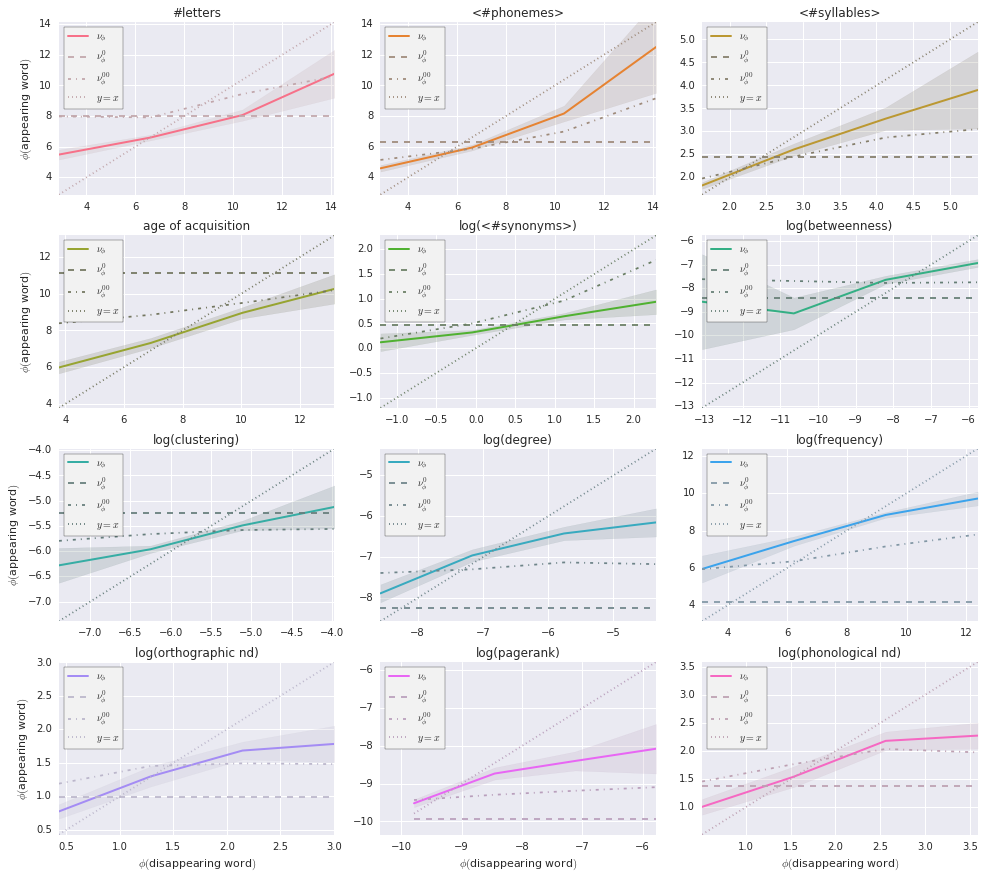

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

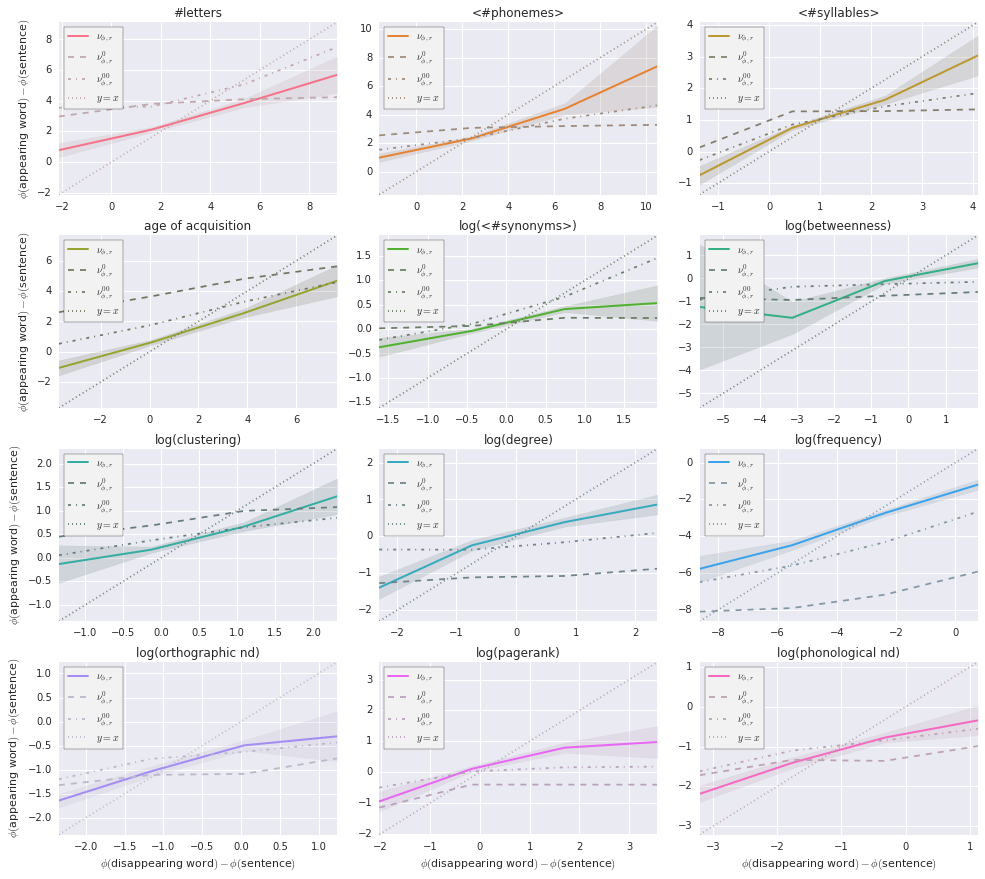

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

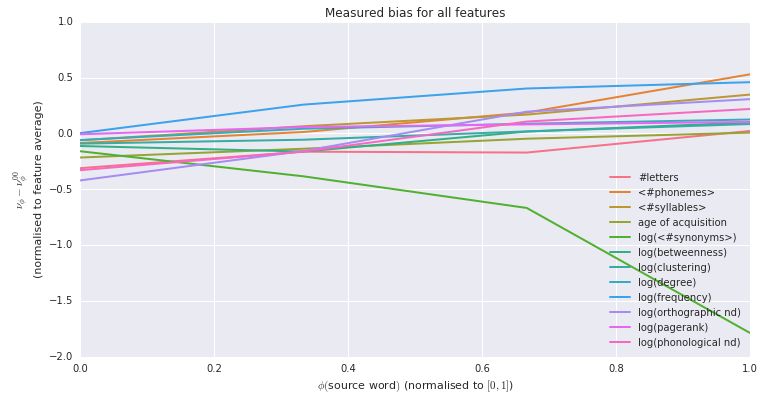

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

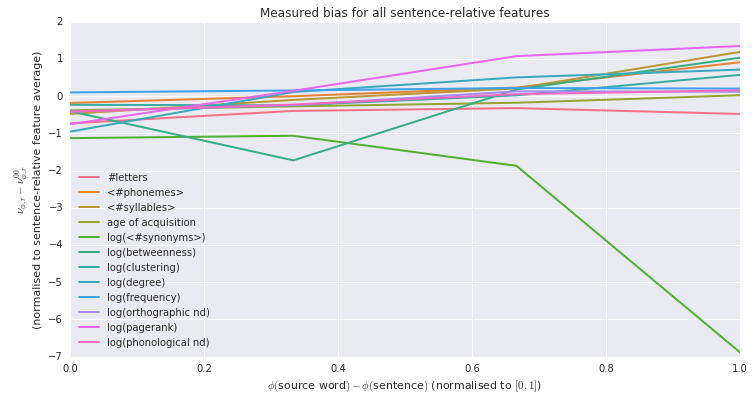

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

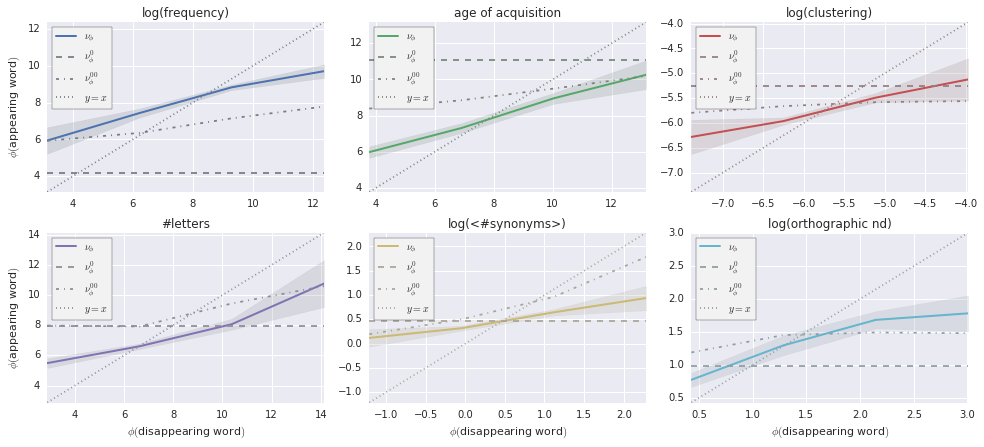

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

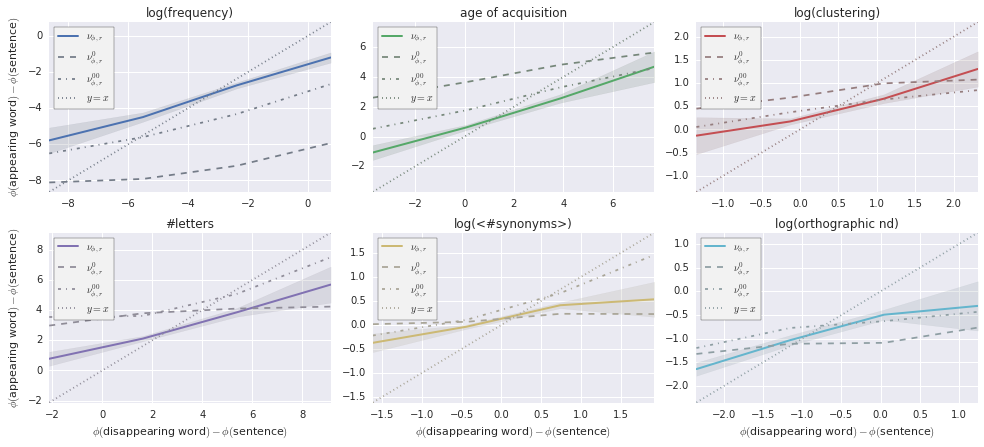

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

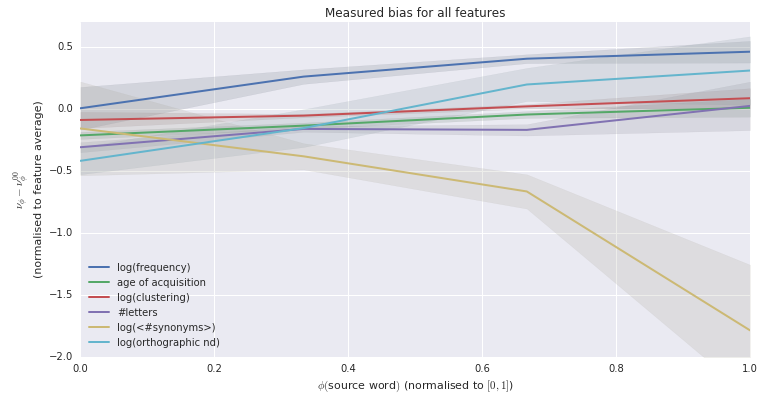

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

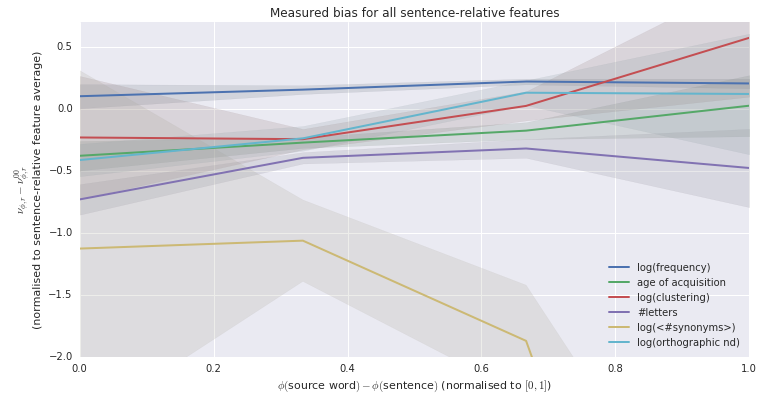

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


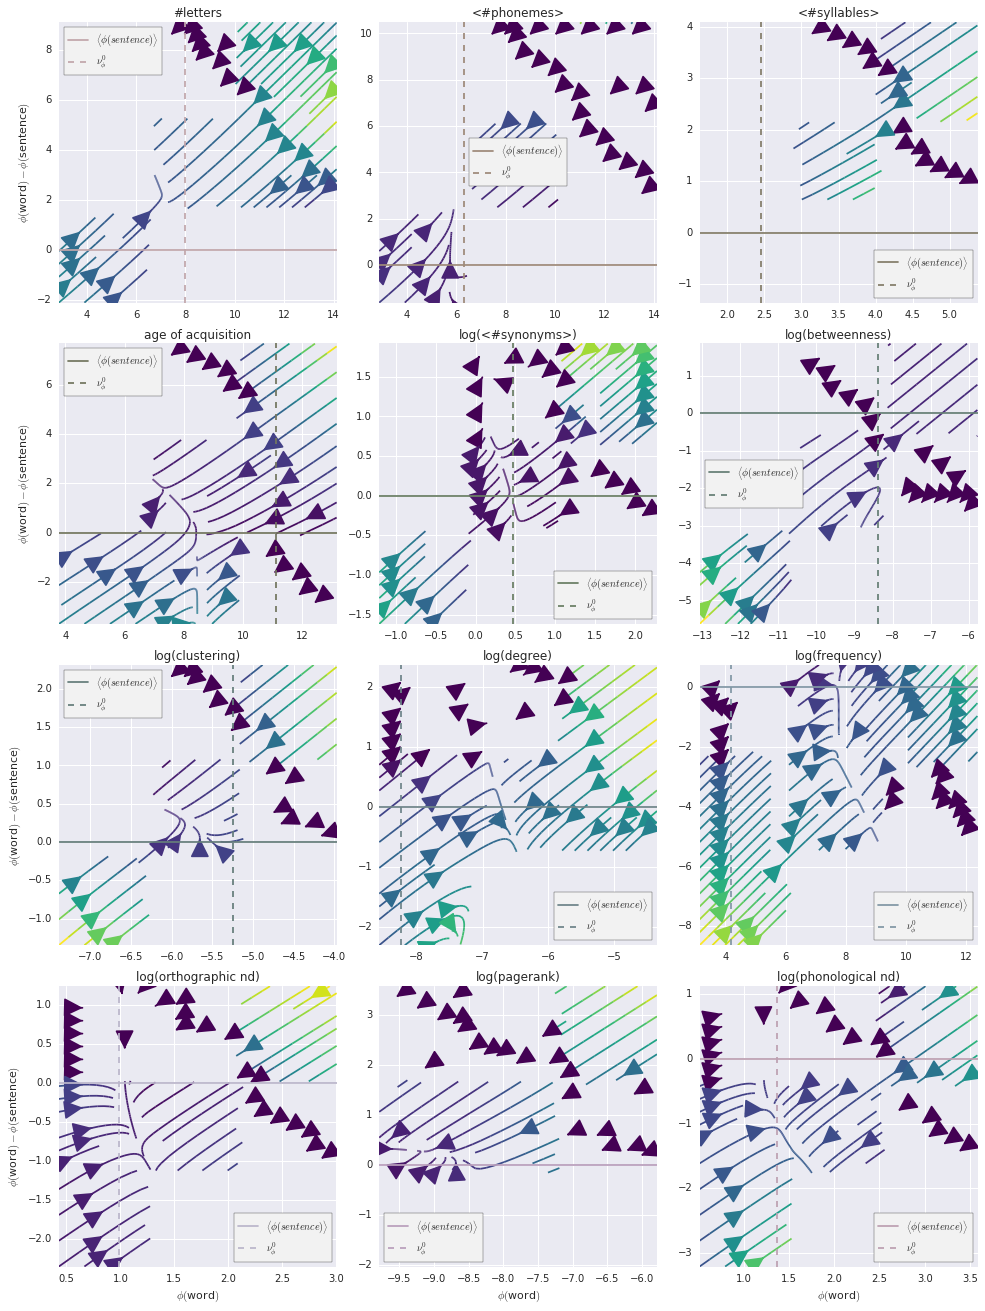

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


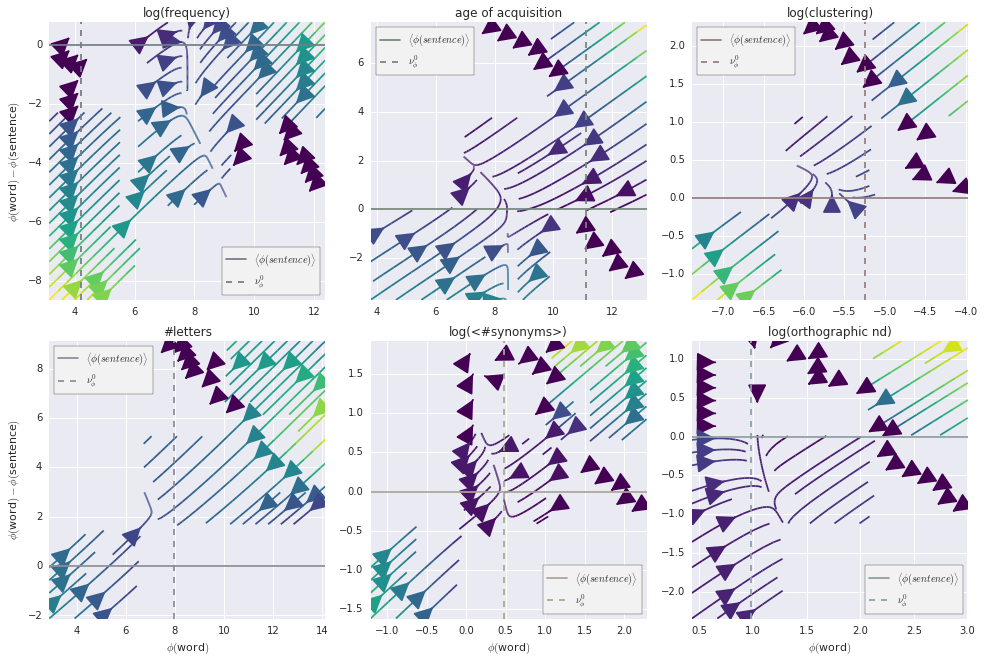

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.53007051  0.17926132  0.08147603  0.07033549  0.0322088   0.03053872
  0.02118191  0.01837388  0.01488699  0.00954135]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.520807,0.261479,-0.085593,0.229315,0.251417,-0.428172,0.193334,0.262377,-0.386129,0.270740,-0.159123,0.000489
Component-1,0.325322,-0.399872,0.112850,-0.276882,-0.245518,-0.429002,0.161293,-0.279484,-0.467851,0.223148,-0.164970,0.022941
Component-2,-0.603427,-0.657865,0.102747,-0.198645,0.290089,0.142974,0.003908,-0.187472,0.073787,-0.054479,0.050088,0.048958


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 26478) |          | Elapsed Time: 0:00:54 ETA:  16 days, 20:15:15

  0% (   85 of 26478) |                    | Elapsed Time: 0:00:55 ETA:  0:04:19

  0% (  180 of 26478) |                    | Elapsed Time: 0:00:56 ETA:  0:03:59

  1% (  267 of 26478) |                    | Elapsed Time: 0:00:57 ETA:  0:04:01

  1% (  331 of 26478) |                    | Elapsed Time: 0:00:58 ETA:  0:03:57

  1% (  425 of 26478) |                    | Elapsed Time: 0:00:59 ETA:  0:03:54

  2% (  534 of 26478) |                    | Elapsed Time: 0:01:00 ETA:  0:03:42

  2% (  636 of 26478) |                    | Elapsed Time: 0:01:01 ETA:  0:03:38

  2% (  662 of 26478) |                    | Elapsed Time: 0:01:01 ETA:  0:03:37

  2% (  767 of 26478) |                    | Elapsed Time: 0:01:02 ETA:  0:03:32

  3% (  862 of 26478) |                    | Elapsed Time: 0:01:03 ETA:  0:03:27

  3% (  969 of 26478) |                    | Elapsed Time: 0:01:04 ETA:  0:03:22

  3% (  993 of 26478) |                    | Elapsed Time: 0:01:05 ETA:  0:03:16

  4% ( 1107 of 26478) |                    | Elapsed Time: 0:01:06 ETA:  0:03:09

  4% ( 1208 of 26478) |                    | Elapsed Time: 0:01:07 ETA:  0:03:06

  4% ( 1265 of 26478) |                    | Elapsed Time: 0:01:08 ETA:  0:03:23

  4% ( 1310 of 26478) |                    | Elapsed Time: 0:01:09 ETA:  0:03:46

  5% ( 1324 of 26478) |#                   | Elapsed Time: 0:01:09 ETA:  0:03:53

  5% ( 1371 of 26478) |#                   | Elapsed Time: 0:01:10 ETA:  0:04:21

  5% ( 1421 of 26478) |#                   | Elapsed Time: 0:01:11 ETA:  0:04:47

  5% ( 1469 of 26478) |#                   | Elapsed Time: 0:01:12 ETA:  0:05:30

  5% ( 1524 of 26478) |#                   | Elapsed Time: 0:01:13 ETA:  0:05:45

  5% ( 1572 of 26478) |#                   | Elapsed Time: 0:01:14 ETA:  0:06:44

  6% ( 1655 of 26478) |#                   | Elapsed Time: 0:01:15 ETA:  0:07:16

  6% ( 1744 of 26478) |#                   | Elapsed Time: 0:01:16 ETA:  0:06:22

  6% ( 1832 of 26478) |#                   | Elapsed Time: 0:01:17 ETA:  0:05:51

  7% ( 1923 of 26478) |#                   | Elapsed Time: 0:01:18 ETA:  0:05:15

  7% ( 1986 of 26478) |#                   | Elapsed Time: 0:01:19 ETA:  0:04:50

  7% ( 2083 of 26478) |#                   | Elapsed Time: 0:01:20 ETA:  0:04:19

  8% ( 2174 of 26478) |#                   | Elapsed Time: 0:01:21 ETA:  0:03:59

  8% ( 2261 of 26478) |#                   | Elapsed Time: 0:01:22 ETA:  0:03:40

  8% ( 2317 of 26478) |#                   | Elapsed Time: 0:01:23 ETA:  0:03:38

  9% ( 2413 of 26478) |#                   | Elapsed Time: 0:01:24 ETA:  0:03:33

  9% ( 2497 of 26478) |#                   | Elapsed Time: 0:01:25 ETA:  0:03:34

  9% ( 2575 of 26478) |#                   | Elapsed Time: 0:01:26 ETA:  0:03:37

 10% ( 2648 of 26478) |##                  | Elapsed Time: 0:01:27 ETA:  0:03:43

 10% ( 2712 of 26478) |##                  | Elapsed Time: 0:01:28 ETA:  0:03:53

 10% ( 2779 of 26478) |##                  | Elapsed Time: 0:01:29 ETA:  0:04:06

 10% ( 2868 of 26478) |##                  | Elapsed Time: 0:01:30 ETA:  0:04:06

 11% ( 2934 of 26478) |##                  | Elapsed Time: 0:01:31 ETA:  0:04:16

 11% ( 2979 of 26478) |##                  | Elapsed Time: 0:01:31 ETA:  0:04:14

 11% ( 3046 of 26478) |##                  | Elapsed Time: 0:01:32 ETA:  0:04:30

 11% ( 3111 of 26478) |##                  | Elapsed Time: 0:01:33 ETA:  0:04:40

 11% ( 3177 of 26478) |##                  | Elapsed Time: 0:01:34 ETA:  0:04:46

 12% ( 3245 of 26478) |##                  | Elapsed Time: 0:01:35 ETA:  0:04:50

 12% ( 3310 of 26478) |##                  | Elapsed Time: 0:01:36 ETA:  0:04:47

 12% ( 3379 of 26478) |##                  | Elapsed Time: 0:01:37 ETA:  0:04:45

 13% ( 3446 of 26478) |##                  | Elapsed Time: 0:01:38 ETA:  0:04:58

 13% ( 3515 of 26478) |##                  | Elapsed Time: 0:01:39 ETA:  0:04:55

 13% ( 3579 of 26478) |##                  | Elapsed Time: 0:01:40 ETA:  0:04:57

 13% ( 3641 of 26478) |##                  | Elapsed Time: 0:01:41 ETA:  0:04:58

 14% ( 3708 of 26478) |##                  | Elapsed Time: 0:01:42 ETA:  0:04:56

 14% ( 3772 of 26478) |##                  | Elapsed Time: 0:01:43 ETA:  0:04:57

 14% ( 3834 of 26478) |##                  | Elapsed Time: 0:01:44 ETA:  0:04:59

 14% ( 3900 of 26478) |##                  | Elapsed Time: 0:01:45 ETA:  0:04:59

 15% ( 3972 of 26478) |###                 | Elapsed Time: 0:01:47 ETA:  0:05:02

 15% ( 4038 of 26478) |###                 | Elapsed Time: 0:01:48 ETA:  0:05:03

 15% ( 4103 of 26478) |###                 | Elapsed Time: 0:01:49 ETA:  0:05:02

 15% ( 4168 of 26478) |###                 | Elapsed Time: 0:01:50 ETA:  0:05:00

 15% ( 4236 of 26478) |###                 | Elapsed Time: 0:01:51 ETA:  0:04:58

 16% ( 4303 of 26478) |###                 | Elapsed Time: 0:01:52 ETA:  0:04:54

 16% ( 4371 of 26478) |###                 | Elapsed Time: 0:01:53 ETA:  0:04:49

 16% ( 4436 of 26478) |###                 | Elapsed Time: 0:01:54 ETA:  0:04:48

 17% ( 4504 of 26478) |###                 | Elapsed Time: 0:01:55 ETA:  0:04:46

 17% ( 4586 of 26478) |###                 | Elapsed Time: 0:01:56 ETA:  0:04:34

 17% ( 4634 of 26478) |###                 | Elapsed Time: 0:01:56 ETA:  0:04:28

 17% ( 4705 of 26478) |###                 | Elapsed Time: 0:01:57 ETA:  0:04:23

 18% ( 4778 of 26478) |###                 | Elapsed Time: 0:01:58 ETA:  0:04:16

 18% ( 4846 of 26478) |###                 | Elapsed Time: 0:01:59 ETA:  0:04:15

 18% ( 4924 of 26478) |###                 | Elapsed Time: 0:02:00 ETA:  0:04:07

 18% ( 4965 of 26478) |###                 | Elapsed Time: 0:02:01 ETA:  0:04:02

 18% ( 5029 of 26478) |###                 | Elapsed Time: 0:02:02 ETA:  0:04:02

 19% ( 5097 of 26478) |###                 | Elapsed Time: 0:02:03 ETA:  0:04:02

 19% ( 5167 of 26478) |###                 | Elapsed Time: 0:02:04 ETA:  0:04:09

 19% ( 5246 of 26478) |###                 | Elapsed Time: 0:02:05 ETA:  0:04:06

 20% ( 5296 of 26478) |####                | Elapsed Time: 0:02:06 ETA:  0:04:06

 20% ( 5379 of 26478) |####                | Elapsed Time: 0:02:07 ETA:  0:03:59

 20% ( 5454 of 26478) |####                | Elapsed Time: 0:02:08 ETA:  0:03:54

 20% ( 5518 of 26478) |####                | Elapsed Time: 0:02:09 ETA:  0:04:02

 21% ( 5597 of 26478) |####                | Elapsed Time: 0:02:10 ETA:  0:03:58

 21% ( 5627 of 26478) |####                | Elapsed Time: 0:02:10 ETA:  0:03:50

 21% ( 5709 of 26478) |####                | Elapsed Time: 0:02:11 ETA:  0:03:40

 21% ( 5789 of 26478) |####                | Elapsed Time: 0:02:12 ETA:  0:03:34

 22% ( 5862 of 26478) |####                | Elapsed Time: 0:02:13 ETA:  0:03:37

 22% ( 5940 of 26478) |####                | Elapsed Time: 0:02:14 ETA:  0:03:32

 22% ( 5958 of 26478) |####                | Elapsed Time: 0:02:14 ETA:  0:03:34

 22% ( 6036 of 26478) |####                | Elapsed Time: 0:02:15 ETA:  0:03:31

 23% ( 6118 of 26478) |####                | Elapsed Time: 0:02:16 ETA:  0:03:19

 23% ( 6200 of 26478) |####                | Elapsed Time: 0:02:17 ETA:  0:03:17

 23% ( 6274 of 26478) |####                | Elapsed Time: 0:02:18 ETA:  0:03:20

 23% ( 6289 of 26478) |####                | Elapsed Time: 0:02:18 ETA:  0:03:22

 24% ( 6376 of 26478) |####                | Elapsed Time: 0:02:19 ETA:  0:03:17

 24% ( 6463 of 26478) |####                | Elapsed Time: 0:02:20 ETA:  0:03:08

 24% ( 6544 of 26478) |####                | Elapsed Time: 0:02:21 ETA:  0:03:05

 25% ( 6620 of 26478) |#####               | Elapsed Time: 0:02:22 ETA:  0:03:04

 25% ( 6700 of 26478) |#####               | Elapsed Time: 0:02:23 ETA:  0:03:02

 25% ( 6764 of 26478) |#####               | Elapsed Time: 0:02:24 ETA:  0:03:10

 25% ( 6826 of 26478) |#####               | Elapsed Time: 0:02:25 ETA:  0:03:20

 26% ( 6897 of 26478) |#####               | Elapsed Time: 0:02:26 ETA:  0:03:20

 26% ( 6951 of 26478) |#####               | Elapsed Time: 0:02:27 ETA:  0:03:18

 26% ( 7028 of 26478) |#####               | Elapsed Time: 0:02:28 ETA:  0:03:23

 26% ( 7093 of 26478) |#####               | Elapsed Time: 0:02:29 ETA:  0:03:34

 27% ( 7196 of 26478) |#####               | Elapsed Time: 0:02:30 ETA:  0:03:21

 27% ( 7282 of 26478) |#####               | Elapsed Time: 0:02:31 ETA:  0:03:15

 27% ( 7363 of 26478) |#####               | Elapsed Time: 0:02:32 ETA:  0:03:13

 28% ( 7454 of 26478) |#####               | Elapsed Time: 0:02:33 ETA:  0:02:59

 28% ( 7551 of 26478) |#####               | Elapsed Time: 0:02:34 ETA:  0:02:42

 28% ( 7613 of 26478) |#####               | Elapsed Time: 0:02:35 ETA:  0:02:31

 29% ( 7710 of 26478) |#####               | Elapsed Time: 0:02:36 ETA:  0:02:23

 29% ( 7777 of 26478) |#####               | Elapsed Time: 0:02:37 ETA:  0:02:26

 29% ( 7843 of 26478) |#####               | Elapsed Time: 0:02:38 ETA:  0:02:25

 29% ( 7904 of 26478) |#####               | Elapsed Time: 0:02:39 ETA:  0:02:42

 30% ( 7944 of 26478) |######              | Elapsed Time: 0:02:39 ETA:  0:02:51

 30% ( 8008 of 26478) |######              | Elapsed Time: 0:02:40 ETA:  0:03:00

 30% ( 8081 of 26478) |######              | Elapsed Time: 0:02:41 ETA:  0:03:09

 30% ( 8168 of 26478) |######              | Elapsed Time: 0:02:42 ETA:  0:03:13

 31% ( 8255 of 26478) |######              | Elapsed Time: 0:02:43 ETA:  0:03:15

 31% ( 8275 of 26478) |######              | Elapsed Time: 0:02:44 ETA:  0:03:27

 31% ( 8357 of 26478) |######              | Elapsed Time: 0:02:45 ETA:  0:03:16

 31% ( 8442 of 26478) |######              | Elapsed Time: 0:02:46 ETA:  0:03:04

 32% ( 8515 of 26478) |######              | Elapsed Time: 0:02:47 ETA:  0:02:56

 32% ( 8588 of 26478) |######              | Elapsed Time: 0:02:48 ETA:  0:02:53

 32% ( 8606 of 26478) |######              | Elapsed Time: 0:02:48 ETA:  0:02:46

 32% ( 8692 of 26478) |######              | Elapsed Time: 0:02:49 ETA:  0:02:37

 33% ( 8770 of 26478) |######              | Elapsed Time: 0:02:50 ETA:  0:02:41

 33% ( 8845 of 26478) |######              | Elapsed Time: 0:02:51 ETA:  0:02:47

 33% ( 8937 of 26478) |######              | Elapsed Time: 0:02:52 ETA:  0:02:43

 34% ( 9022 of 26478) |######              | Elapsed Time: 0:02:53 ETA:  0:02:42

 34% ( 9109 of 26478) |######              | Elapsed Time: 0:02:54 ETA:  0:02:33

 34% ( 9189 of 26478) |######              | Elapsed Time: 0:02:55 ETA:  0:02:28

 35% ( 9268 of 26478) |#######             | Elapsed Time: 0:02:56 ETA:  0:02:30

 35% ( 9361 of 26478) |#######             | Elapsed Time: 0:02:57 ETA:  0:02:20

 35% ( 9459 of 26478) |#######             | Elapsed Time: 0:02:58 ETA:  0:02:07

 36% ( 9555 of 26478) |#######             | Elapsed Time: 0:02:59 ETA:  0:02:02

 36% ( 9599 of 26478) |#######             | Elapsed Time: 0:03:00 ETA:  0:02:00

 36% ( 9709 of 26478) |#######             | Elapsed Time: 0:03:01 ETA:  0:01:48

 37% ( 9825 of 26478) |#######             | Elapsed Time: 0:03:02 ETA:  0:01:35

 37% ( 9914 of 26478) |#######             | Elapsed Time: 0:03:03 ETA:  0:01:31

 37% ( 9930 of 26478) |#######             | Elapsed Time: 0:03:03 ETA:  0:01:24

 37% ( 9991 of 26478) |#######             | Elapsed Time: 0:03:04 ETA:  0:01:37

 37% (10043 of 26478) |#######             | Elapsed Time: 0:03:05 ETA:  0:01:53

 38% (10114 of 26478) |#######             | Elapsed Time: 0:03:06 ETA:  0:02:05

 38% (10160 of 26478) |#######             | Elapsed Time: 0:03:07 ETA:  0:02:30

 38% (10211 of 26478) |#######             | Elapsed Time: 0:03:08 ETA:  0:02:48

 38% (10261 of 26478) |#######             | Elapsed Time: 0:03:09 ETA:  0:03:22

 39% (10338 of 26478) |#######             | Elapsed Time: 0:03:10 ETA:  0:03:50

 39% (10417 of 26478) |#######             | Elapsed Time: 0:03:11 ETA:  0:03:58

 39% (10495 of 26478) |#######             | Elapsed Time: 0:03:12 ETA:  0:03:48

 39% (10564 of 26478) |#######             | Elapsed Time: 0:03:13 ETA:  0:03:41

 40% (10592 of 26478) |########            | Elapsed Time: 0:03:13 ETA:  0:03:26

 40% (10690 of 26478) |########            | Elapsed Time: 0:03:14 ETA:  0:03:06

 40% (10789 of 26478) |########            | Elapsed Time: 0:03:15 ETA:  0:02:33

 41% (10877 of 26478) |########            | Elapsed Time: 0:03:16 ETA:  0:02:13

 41% (10923 of 26478) |########            | Elapsed Time: 0:03:17 ETA:  0:02:21

 41% (10964 of 26478) |########            | Elapsed Time: 0:03:18 ETA:  0:02:44

 41% (11059 of 26478) |########            | Elapsed Time: 0:03:19 ETA:  0:02:32

 42% (11142 of 26478) |########            | Elapsed Time: 0:03:20 ETA:  0:02:22

 42% (11210 of 26478) |########            | Elapsed Time: 0:03:21 ETA:  0:02:27

 42% (11254 of 26478) |########            | Elapsed Time: 0:03:22 ETA:  0:02:42

 42% (11345 of 26478) |########            | Elapsed Time: 0:03:23 ETA:  0:02:47

 43% (11434 of 26478) |########            | Elapsed Time: 0:03:24 ETA:  0:02:45

 43% (11533 of 26478) |########            | Elapsed Time: 0:03:25 ETA:  0:02:10

 43% (11585 of 26478) |########            | Elapsed Time: 0:03:25 ETA:  0:02:03

 44% (11655 of 26478) |########            | Elapsed Time: 0:03:26 ETA:  0:01:48

 44% (11721 of 26478) |########            | Elapsed Time: 0:03:27 ETA:  0:02:01

 44% (11775 of 26478) |########            | Elapsed Time: 0:03:33 ETA:  0:05:14

 44% (11857 of 26478) |########            | Elapsed Time: 0:03:34 ETA:  0:05:01

 45% (11916 of 26478) |#########           | Elapsed Time: 0:03:35 ETA:  0:04:51

 45% (12010 of 26478) |#########           | Elapsed Time: 0:03:36 ETA:  0:04:48

 45% (12097 of 26478) |#########           | Elapsed Time: 0:03:37 ETA:  0:04:49

 45% (12166 of 26478) |#########           | Elapsed Time: 0:03:38 ETA:  0:05:12

 46% (12247 of 26478) |#########           | Elapsed Time: 0:03:39 ETA:  0:05:31

 46% (12328 of 26478) |#########           | Elapsed Time: 0:03:40 ETA:  0:05:16

 46% (12412 of 26478) |#########           | Elapsed Time: 0:03:41 ETA:  0:01:49

 47% (12493 of 26478) |#########           | Elapsed Time: 0:03:42 ETA:  0:01:48

 47% (12578 of 26478) |#########           | Elapsed Time: 0:03:43 ETA:  0:01:47

 47% (12663 of 26478) |#########           | Elapsed Time: 0:03:44 ETA:  0:01:51

 48% (12761 of 26478) |#########           | Elapsed Time: 0:03:45 ETA:  0:01:44

 48% (12853 of 26478) |#########           | Elapsed Time: 0:03:46 ETA:  0:01:32

 48% (12909 of 26478) |#########           | Elapsed Time: 0:03:46 ETA:  0:01:21

 49% (13000 of 26478) |#########           | Elapsed Time: 0:03:47 ETA:  0:01:17

 49% (13092 of 26478) |#########           | Elapsed Time: 0:03:48 ETA:  0:01:12

 49% (13162 of 26478) |#########           | Elapsed Time: 0:03:49 ETA:  0:01:16

 50% (13240 of 26478) |##########          | Elapsed Time: 0:03:51 ETA:  0:01:23

 50% (13322 of 26478) |##########          | Elapsed Time: 0:03:52 ETA:  0:01:23

 50% (13400 of 26478) |##########          | Elapsed Time: 0:03:53 ETA:  0:01:32

 50% (13485 of 26478) |##########          | Elapsed Time: 0:03:54 ETA:  0:01:35

 51% (13570 of 26478) |##########          | Elapsed Time: 0:03:55 ETA:  0:01:47

 51% (13653 of 26478) |##########          | Elapsed Time: 0:03:56 ETA:  0:01:51

 51% (13739 of 26478) |##########          | Elapsed Time: 0:03:57 ETA:  0:01:41

 52% (13820 of 26478) |##########          | Elapsed Time: 0:03:58 ETA:  0:01:31

 52% (13901 of 26478) |##########          | Elapsed Time: 0:03:59 ETA:  0:01:27

 52% (13972 of 26478) |##########          | Elapsed Time: 0:04:00 ETA:  0:01:32

 53% (14049 of 26478) |##########          | Elapsed Time: 0:04:01 ETA:  0:01:31

 53% (14136 of 26478) |##########          | Elapsed Time: 0:04:02 ETA:  0:01:29

 53% (14232 of 26478) |##########          | Elapsed Time: 0:04:03 ETA:  0:01:21

 54% (14330 of 26478) |##########          | Elapsed Time: 0:04:04 ETA:  0:01:13

 54% (14414 of 26478) |##########          | Elapsed Time: 0:04:05 ETA:  0:01:12

 54% (14521 of 26478) |##########          | Elapsed Time: 0:04:06 ETA:  0:00:59

 55% (14563 of 26478) |###########         | Elapsed Time: 0:04:06 ETA:  0:00:55

 55% (14644 of 26478) |###########         | Elapsed Time: 0:04:07 ETA:  0:00:50

 55% (14723 of 26478) |###########         | Elapsed Time: 0:04:08 ETA:  0:00:47

 55% (14805 of 26478) |###########         | Elapsed Time: 0:04:09 ETA:  0:00:49

 56% (14894 of 26478) |###########         | Elapsed Time: 0:04:11 ETA:  0:00:51

 56% (14980 of 26478) |###########         | Elapsed Time: 0:04:12 ETA:  0:00:55

 56% (15081 of 26478) |###########         | Elapsed Time: 0:04:13 ETA:  0:00:46

 57% (15179 of 26478) |###########         | Elapsed Time: 0:04:14 ETA:  0:00:50

 57% (15225 of 26478) |###########         | Elapsed Time: 0:04:14 ETA:  0:00:53

 57% (15318 of 26478) |###########         | Elapsed Time: 0:04:15 ETA:  0:00:47

 58% (15398 of 26478) |###########         | Elapsed Time: 0:04:16 ETA:  0:00:46

 58% (15463 of 26478) |###########         | Elapsed Time: 0:04:17 ETA:  0:00:53

 58% (15532 of 26478) |###########         | Elapsed Time: 0:04:18 ETA:  0:00:57

 58% (15556 of 26478) |###########         | Elapsed Time: 0:04:18 ETA:  0:00:54

 59% (15646 of 26478) |###########         | Elapsed Time: 0:04:19 ETA:  0:00:51

 59% (15749 of 26478) |###########         | Elapsed Time: 0:04:20 ETA:  0:00:49

 59% (15849 of 26478) |###########         | Elapsed Time: 0:04:21 ETA:  0:00:47

 60% (15887 of 26478) |############        | Elapsed Time: 0:04:22 ETA:  0:00:42

 60% (15994 of 26478) |############        | Elapsed Time: 0:04:23 ETA:  0:00:34

 60% (16094 of 26478) |############        | Elapsed Time: 0:04:24 ETA:  0:00:25

 61% (16179 of 26478) |############        | Elapsed Time: 0:04:25 ETA:  0:00:16

 61% (16218 of 26478) |############        | Elapsed Time: 0:04:25 ETA:  0:00:10

 61% (16311 of 26478) |############        | Elapsed Time: 0:04:26 ETA:  0:00:11

 61% (16412 of 26478) |############        | Elapsed Time: 0:04:27 ETA:  0:00:07

 62% (16523 of 26478) |############        | Elapsed Time: 0:04:28 ETA:  0:00:03

 62% (16549 of 26478) |############        | Elapsed Time: 0:04:29 ETA:  0:00:02

 62% (16672 of 26478) |############        | Elapsed Time: 0:04:30 ETA:  0:00:00

 63% (16790 of 26478) |############        | Elapsed Time: 0:04:31 ETA:  0:00:00

 63% (16880 of 26478) |############        | Elapsed Time: 0:04:31 ETA:  0:00:00

 64% (16987 of 26478) |############        | Elapsed Time: 0:04:32 ETA:  0:00:00

 64% (17093 of 26478) |############        | Elapsed Time: 0:04:33 ETA:  0:00:00

 65% (17211 of 26478) |#############       | Elapsed Time: 0:04:35 ETA:  0:00:00

 65% (17309 of 26478) |#############       | Elapsed Time: 0:04:36 ETA:  0:00:00

 65% (17401 of 26478) |#############       | Elapsed Time: 0:04:37 ETA:  0:00:00

 66% (17542 of 26478) |#############       | Elapsed Time: 0:04:38 ETA:  0:00:00

 66% (17653 of 26478) |#############       | Elapsed Time: 0:04:39 ETA:  0:00:00

 67% (17757 of 26478) |#############       | Elapsed Time: 0:04:40 ETA:  0:00:00

 67% (17848 of 26478) |#############       | Elapsed Time: 0:04:41 ETA:  0:00:00

 67% (17873 of 26478) |#############       | Elapsed Time: 0:04:41 ETA:  0:00:00

 67% (17974 of 26478) |#############       | Elapsed Time: 0:04:42 ETA:  0:00:00

 68% (18073 of 26478) |#############       | Elapsed Time: 0:04:43 ETA:  0:00:00

 68% (18151 of 26478) |#############       | Elapsed Time: 0:04:44 ETA:  0:00:00

 68% (18204 of 26478) |#############       | Elapsed Time: 0:04:45 ETA:  0:00:00

 69% (18306 of 26478) |#############       | Elapsed Time: 0:04:46 ETA:  0:00:00

 69% (18398 of 26478) |#############       | Elapsed Time: 0:04:47 ETA:  0:00:00

 69% (18508 of 26478) |#############       | Elapsed Time: 0:04:48 ETA:  0:00:00

 70% (18535 of 26478) |##############      | Elapsed Time: 0:04:48 ETA:  0:00:00

 70% (18640 of 26478) |##############      | Elapsed Time: 0:04:49 ETA:  0:00:00

 70% (18747 of 26478) |##############      | Elapsed Time: 0:04:50 ETA:  0:00:00

 71% (18866 of 26478) |##############      | Elapsed Time: 0:04:51 ETA:  0:00:00

 71% (18965 of 26478) |##############      | Elapsed Time: 0:04:52 ETA:  0:00:00

 72% (19065 of 26478) |##############      | Elapsed Time: 0:04:53 ETA:  0:00:00

 72% (19139 of 26478) |##############      | Elapsed Time: 0:04:54 ETA:  0:00:00

 72% (19197 of 26478) |##############      | Elapsed Time: 0:04:55 ETA:  0:00:00

 72% (19293 of 26478) |##############      | Elapsed Time: 0:04:56 ETA:  0:00:00

 73% (19403 of 26478) |##############      | Elapsed Time: 0:04:57 ETA:  0:00:00

 73% (19487 of 26478) |##############      | Elapsed Time: 0:04:58 ETA:  0:00:00

 73% (19528 of 26478) |##############      | Elapsed Time: 0:04:58 ETA:  0:00:00

 74% (19652 of 26478) |##############      | Elapsed Time: 0:04:59 ETA:  0:00:00

 74% (19758 of 26478) |##############      | Elapsed Time: 0:05:00 ETA:  0:00:00

 75% (19859 of 26478) |###############     | Elapsed Time: 0:05:01 ETA:  0:00:00

 75% (19944 of 26478) |###############     | Elapsed Time: 0:05:03 ETA:  0:00:00

 75% (20047 of 26478) |###############     | Elapsed Time: 0:05:04 ETA:  0:00:00

 76% (20146 of 26478) |###############     | Elapsed Time: 0:05:05 ETA:  0:00:00

 76% (20190 of 26478) |###############     | Elapsed Time: 0:05:05 ETA:  0:00:00

 76% (20275 of 26478) |###############     | Elapsed Time: 0:05:06 ETA:  0:00:00

 76% (20366 of 26478) |###############     | Elapsed Time: 0:05:07 ETA:  0:00:00

 77% (20468 of 26478) |###############     | Elapsed Time: 0:05:08 ETA:  0:00:00

 77% (20521 of 26478) |###############     | Elapsed Time: 0:05:08 ETA:  0:00:00

 77% (20600 of 26478) |###############     | Elapsed Time: 0:05:09 ETA:  0:00:00

 78% (20729 of 26478) |###############     | Elapsed Time: 0:05:10 ETA:  0:00:00

 78% (20852 of 26478) |###############     | Elapsed Time: 0:05:12 ETA:  0:00:00

 79% (20937 of 26478) |###############     | Elapsed Time: 0:05:13 ETA:  0:00:00

 79% (21034 of 26478) |###############     | Elapsed Time: 0:05:14 ETA:  0:00:00

 79% (21139 of 26478) |###############     | Elapsed Time: 0:05:15 ETA:  0:00:00

 80% (21183 of 26478) |################    | Elapsed Time: 0:05:15 ETA:  0:00:00

 80% (21270 of 26478) |################    | Elapsed Time: 0:05:16 ETA:  0:00:00

 80% (21391 of 26478) |################    | Elapsed Time: 0:05:17 ETA:  0:00:00

 81% (21474 of 26478) |################    | Elapsed Time: 0:05:18 ETA:  0:00:00

 81% (21514 of 26478) |################    | Elapsed Time: 0:05:19 ETA:  0:00:00

 81% (21597 of 26478) |################    | Elapsed Time: 0:05:20 ETA:  0:00:00

 81% (21696 of 26478) |################    | Elapsed Time: 0:05:21 ETA:  0:00:00

 82% (21789 of 26478) |################    | Elapsed Time: 0:05:22 ETA:  0:00:00

 82% (21845 of 26478) |################    | Elapsed Time: 0:05:22 ETA:  0:00:00

 82% (21944 of 26478) |################    | Elapsed Time: 0:05:23 ETA:  0:00:00

 83% (22068 of 26478) |################    | Elapsed Time: 0:05:24 ETA:  0:00:00

 83% (22155 of 26478) |################    | Elapsed Time: 0:05:25 ETA:  0:00:00

 83% (22176 of 26478) |################    | Elapsed Time: 0:05:25 ETA:  0:00:00

 84% (22242 of 26478) |################    | Elapsed Time: 0:05:26 ETA:  0:00:00

 84% (22355 of 26478) |################    | Elapsed Time: 0:05:27 ETA:  0:00:00

 84% (22407 of 26478) |################    | Elapsed Time: 0:05:28 ETA:  0:00:00

 85% (22507 of 26478) |#################   | Elapsed Time: 0:05:29 ETA:  0:00:00

 85% (22609 of 26478) |#################   | Elapsed Time: 0:05:30 ETA:  0:00:00

 85% (22707 of 26478) |#################   | Elapsed Time: 0:05:31 ETA:  0:00:00

 86% (22838 of 26478) |#################   | Elapsed Time: 0:05:33 ETA:  0:00:00

 86% (22949 of 26478) |#################   | Elapsed Time: 0:05:34 ETA:  0:00:00

 87% (23041 of 26478) |#################   | Elapsed Time: 0:05:35 ETA:  0:00:00

 87% (23147 of 26478) |#################   | Elapsed Time: 0:05:36 ETA:  0:00:00

 87% (23169 of 26478) |#################   | Elapsed Time: 0:05:36 ETA:  0:00:00

 87% (23282 of 26478) |#################   | Elapsed Time: 0:05:37 ETA:  0:00:00

 88% (23378 of 26478) |#################   | Elapsed Time: 0:05:38 ETA:  0:00:00

 88% (23478 of 26478) |#################   | Elapsed Time: 0:05:39 ETA:  0:00:00

 88% (23500 of 26478) |#################   | Elapsed Time: 0:05:39 ETA:  0:00:00

 89% (23606 of 26478) |#################   | Elapsed Time: 0:05:40 ETA:  0:00:00

 89% (23730 of 26478) |#################   | Elapsed Time: 0:05:41 ETA:  0:00:00

 90% (23831 of 26478) |##################  | Elapsed Time: 0:05:42 ETA:  0:00:00

 90% (23926 of 26478) |##################  | Elapsed Time: 0:05:43 ETA:  0:00:00

 90% (24007 of 26478) |##################  | Elapsed Time: 0:05:44 ETA:  0:00:00

 91% (24106 of 26478) |##################  | Elapsed Time: 0:05:45 ETA:  0:00:00

 91% (24162 of 26478) |##################  | Elapsed Time: 0:05:46 ETA:  0:00:00

 91% (24248 of 26478) |##################  | Elapsed Time: 0:05:47 ETA:  0:00:00

 91% (24356 of 26478) |##################  | Elapsed Time: 0:05:48 ETA:  0:00:00

 92% (24457 of 26478) |##################  | Elapsed Time: 0:05:49 ETA:  0:00:00

 92% (24493 of 26478) |##################  | Elapsed Time: 0:05:49 ETA:  0:00:00

 92% (24576 of 26478) |##################  | Elapsed Time: 0:05:50 ETA:  0:00:00

 93% (24681 of 26478) |##################  | Elapsed Time: 0:05:51 ETA:  0:00:00

 93% (24782 of 26478) |##################  | Elapsed Time: 0:05:52 ETA:  0:00:00

 93% (24824 of 26478) |##################  | Elapsed Time: 0:05:52 ETA:  0:00:00

 94% (24930 of 26478) |##################  | Elapsed Time: 0:05:53 ETA:  0:00:00

 94% (25027 of 26478) |##################  | Elapsed Time: 0:05:54 ETA:  0:00:00

 94% (25114 of 26478) |##################  | Elapsed Time: 0:05:55 ETA:  0:00:00

 95% (25155 of 26478) |################### | Elapsed Time: 0:05:56 ETA:  0:00:00

 95% (25265 of 26478) |################### | Elapsed Time: 0:05:57 ETA:  0:00:00

 95% (25368 of 26478) |################### | Elapsed Time: 0:05:58 ETA:  0:00:00

 96% (25486 of 26478) |################### | Elapsed Time: 0:05:59 ETA:  0:00:00

 96% (25596 of 26478) |################### | Elapsed Time: 0:06:00 ETA:  0:00:00

 97% (25710 of 26478) |################### | Elapsed Time: 0:06:01 ETA:  0:00:00

 97% (25817 of 26478) |################### | Elapsed Time: 0:06:02 ETA:  0:00:00

 97% (25923 of 26478) |################### | Elapsed Time: 0:06:03 ETA:  0:00:00

 98% (26031 of 26478) |################### | Elapsed Time: 0:06:04 ETA:  0:00:00

 98% (26148 of 26478) |################### | Elapsed Time: 0:06:05 ETA:  0:00:00

 99% (26253 of 26478) |################### | Elapsed Time: 0:06:06 ETA:  0:00:00

 99% (26354 of 26478) |################### | Elapsed Time: 0:06:07 ETA:  0:00:00

100% (26478 of 26478) |####################| Elapsed Time: 0:06:08 Time: 0:06:08


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

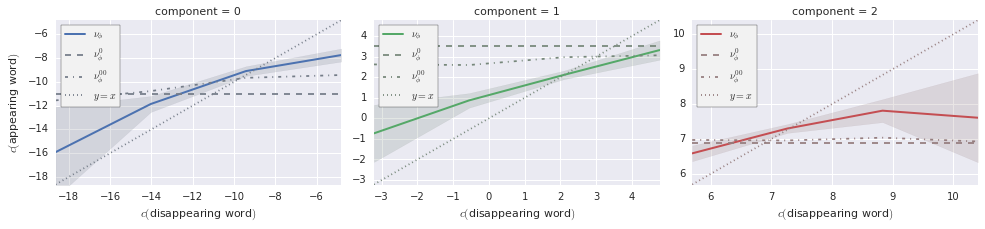

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.58678039  0.17858401  0.13535637]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.726932,-0.084559,0.326407,-0.544590,0.247561,-0.003751
Component-1,0.414706,0.097614,-0.466496,-0.730747,0.258605,-0.001846
Component-2,-0.541699,0.065955,-0.811903,0.196940,-0.064220,0.010755


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 26478) |            | Elapsed Time: 0:00:14 ETA:  4 days, 8:02:36

  0% (   97 of 26478) |                    | Elapsed Time: 0:00:15 ETA:  0:04:21

  0% (  200 of 26478) |                    | Elapsed Time: 0:00:16 ETA:  0:04:10

  1% (  299 of 26478) |                    | Elapsed Time: 0:00:17 ETA:  0:04:10

  1% (  331 of 26478) |                    | Elapsed Time: 0:00:17 ETA:  0:04:11

  1% (  435 of 26478) |                    | Elapsed Time: 0:00:18 ETA:  0:04:07

  2% (  547 of 26478) |                    | Elapsed Time: 0:00:19 ETA:  0:04:00

  2% (  662 of 26478) |                    | Elapsed Time: 0:00:20 ETA:  0:03:56

  2% (  775 of 26478) |                    | Elapsed Time: 0:00:21 ETA:  0:03:52

  3% (  886 of 26478) |                    | Elapsed Time: 0:00:22 ETA:  0:03:46

  3% (  993 of 26478) |                    | Elapsed Time: 0:00:23 ETA:  0:03:42

  4% ( 1123 of 26478) |                    | Elapsed Time: 0:00:24 ETA:  0:03:32

  4% ( 1238 of 26478) |                    | Elapsed Time: 0:00:25 ETA:  0:03:28

  4% ( 1303 of 26478) |                    | Elapsed Time: 0:00:26 ETA:  0:03:38

  5% ( 1324 of 26478) |#                   | Elapsed Time: 0:00:26 ETA:  0:03:43

  5% ( 1387 of 26478) |#                   | Elapsed Time: 0:00:27 ETA:  0:03:58

  5% ( 1451 of 26478) |#                   | Elapsed Time: 0:00:28 ETA:  0:04:09

  5% ( 1518 of 26478) |#                   | Elapsed Time: 0:00:29 ETA:  0:04:26

  5% ( 1582 of 26478) |#                   | Elapsed Time: 0:00:30 ETA:  0:04:45

  6% ( 1655 of 26478) |#                   | Elapsed Time: 0:00:31 ETA:  0:04:52

  6% ( 1764 of 26478) |#                   | Elapsed Time: 0:00:32 ETA:  0:05:02

  7% ( 1868 of 26478) |#                   | Elapsed Time: 0:00:33 ETA:  0:05:07

  7% ( 1986 of 26478) |#                   | Elapsed Time: 0:00:34 ETA:  0:04:41

  7% ( 2096 of 26478) |#                   | Elapsed Time: 0:00:35 ETA:  0:04:19

  8% ( 2207 of 26478) |#                   | Elapsed Time: 0:00:36 ETA:  0:04:00

  8% ( 2317 of 26478) |#                   | Elapsed Time: 0:00:37 ETA:  0:03:34

  9% ( 2432 of 26478) |#                   | Elapsed Time: 0:00:38 ETA:  0:03:28

  9% ( 2537 of 26478) |#                   | Elapsed Time: 0:00:39 ETA:  0:03:28

 10% ( 2648 of 26478) |##                  | Elapsed Time: 0:00:41 ETA:  0:03:29

 10% ( 2729 of 26478) |##                  | Elapsed Time: 0:00:42 ETA:  0:03:37

 10% ( 2829 of 26478) |##                  | Elapsed Time: 0:00:43 ETA:  0:03:40

 11% ( 2915 of 26478) |##                  | Elapsed Time: 0:00:44 ETA:  0:03:48

 11% ( 2979 of 26478) |##                  | Elapsed Time: 0:00:44 ETA:  0:03:49

 11% ( 3068 of 26478) |##                  | Elapsed Time: 0:00:45 ETA:  0:03:51

 11% ( 3161 of 26478) |##                  | Elapsed Time: 0:00:46 ETA:  0:03:58

 12% ( 3256 of 26478) |##                  | Elapsed Time: 0:00:47 ETA:  0:04:02

 12% ( 3310 of 26478) |##                  | Elapsed Time: 0:00:48 ETA:  0:04:02

 12% ( 3404 of 26478) |##                  | Elapsed Time: 0:00:49 ETA:  0:04:00

 13% ( 3496 of 26478) |##                  | Elapsed Time: 0:00:50 ETA:  0:03:55

 13% ( 3584 of 26478) |##                  | Elapsed Time: 0:00:51 ETA:  0:03:58

 13% ( 3641 of 26478) |##                  | Elapsed Time: 0:00:52 ETA:  0:03:58

 14% ( 3733 of 26478) |##                  | Elapsed Time: 0:00:53 ETA:  0:03:58

 14% ( 3827 of 26478) |##                  | Elapsed Time: 0:00:54 ETA:  0:03:55

 14% ( 3920 of 26478) |##                  | Elapsed Time: 0:00:55 ETA:  0:03:54

 15% ( 3972 of 26478) |###                 | Elapsed Time: 0:00:55 ETA:  0:03:54

 15% ( 4066 of 26478) |###                 | Elapsed Time: 0:00:56 ETA:  0:03:54

 15% ( 4159 of 26478) |###                 | Elapsed Time: 0:00:57 ETA:  0:03:53

 16% ( 4253 of 26478) |###                 | Elapsed Time: 0:00:58 ETA:  0:03:52

 16% ( 4303 of 26478) |###                 | Elapsed Time: 0:00:59 ETA:  0:03:49

 16% ( 4398 of 26478) |###                 | Elapsed Time: 0:01:00 ETA:  0:03:44

 16% ( 4495 of 26478) |###                 | Elapsed Time: 0:01:01 ETA:  0:03:41

 17% ( 4609 of 26478) |###                 | Elapsed Time: 0:01:02 ETA:  0:03:33

 17% ( 4634 of 26478) |###                 | Elapsed Time: 0:01:02 ETA:  0:03:30

 17% ( 4733 of 26478) |###                 | Elapsed Time: 0:01:03 ETA:  0:03:28

 18% ( 4833 of 26478) |###                 | Elapsed Time: 0:01:04 ETA:  0:03:25

 18% ( 4935 of 26478) |###                 | Elapsed Time: 0:01:05 ETA:  0:03:20

 18% ( 4965 of 26478) |###                 | Elapsed Time: 0:01:05 ETA:  0:03:17

 19% ( 5060 of 26478) |###                 | Elapsed Time: 0:01:06 ETA:  0:03:17

 19% ( 5156 of 26478) |###                 | Elapsed Time: 0:01:07 ETA:  0:03:15

 19% ( 5259 of 26478) |###                 | Elapsed Time: 0:01:08 ETA:  0:03:12

 20% ( 5296 of 26478) |####                | Elapsed Time: 0:01:09 ETA:  0:03:17

 20% ( 5404 of 26478) |####                | Elapsed Time: 0:01:10 ETA:  0:03:14

 20% ( 5501 of 26478) |####                | Elapsed Time: 0:01:11 ETA:  0:03:14

 21% ( 5605 of 26478) |####                | Elapsed Time: 0:01:12 ETA:  0:03:11

 21% ( 5627 of 26478) |####                | Elapsed Time: 0:01:12 ETA:  0:03:11

 21% ( 5736 of 26478) |####                | Elapsed Time: 0:01:13 ETA:  0:03:07

 22% ( 5843 of 26478) |####                | Elapsed Time: 0:01:14 ETA:  0:03:02

 22% ( 5958 of 26478) |####                | Elapsed Time: 0:01:15 ETA:  0:03:00

 22% ( 6059 of 26478) |####                | Elapsed Time: 0:01:16 ETA:  0:02:59

 23% ( 6166 of 26478) |####                | Elapsed Time: 0:01:17 ETA:  0:02:58

 23% ( 6266 of 26478) |####                | Elapsed Time: 0:01:18 ETA:  0:02:56

 23% ( 6289 of 26478) |####                | Elapsed Time: 0:01:18 ETA:  0:02:57

 24% ( 6398 of 26478) |####                | Elapsed Time: 0:01:19 ETA:  0:02:55

 24% ( 6505 of 26478) |####                | Elapsed Time: 0:01:20 ETA:  0:02:55

 25% ( 6620 of 26478) |#####               | Elapsed Time: 0:01:21 ETA:  0:02:52

 25% ( 6721 of 26478) |#####               | Elapsed Time: 0:01:22 ETA:  0:02:52

 25% ( 6813 of 26478) |#####               | Elapsed Time: 0:01:23 ETA:  0:02:54

 26% ( 6907 of 26478) |#####               | Elapsed Time: 0:01:24 ETA:  0:02:58

 26% ( 6951 of 26478) |#####               | Elapsed Time: 0:01:25 ETA:  0:02:57

 26% ( 7056 of 26478) |#####               | Elapsed Time: 0:01:26 ETA:  0:02:53

 26% ( 7149 of 26478) |#####               | Elapsed Time: 0:01:27 ETA:  0:02:58

 27% ( 7282 of 26478) |#####               | Elapsed Time: 0:01:28 ETA:  0:02:54

 27% ( 7400 of 26478) |#####               | Elapsed Time: 0:01:29 ETA:  0:02:48

 28% ( 7522 of 26478) |#####               | Elapsed Time: 0:01:30 ETA:  0:02:40

 28% ( 7613 of 26478) |#####               | Elapsed Time: 0:01:31 ETA:  0:02:29

 29% ( 7733 of 26478) |#####               | Elapsed Time: 0:01:32 ETA:  0:02:21

 29% ( 7819 of 26478) |#####               | Elapsed Time: 0:01:33 ETA:  0:02:26

 29% ( 7900 of 26478) |#####               | Elapsed Time: 0:01:34 ETA:  0:02:32

 30% ( 7944 of 26478) |######              | Elapsed Time: 0:01:34 ETA:  0:02:31

 30% ( 8028 of 26478) |######              | Elapsed Time: 0:01:35 ETA:  0:02:41

 30% ( 8139 of 26478) |######              | Elapsed Time: 0:01:36 ETA:  0:02:38

 31% ( 8275 of 26478) |######              | Elapsed Time: 0:01:37 ETA:  0:02:43

 31% ( 8390 of 26478) |######              | Elapsed Time: 0:01:38 ETA:  0:02:44

 32% ( 8499 of 26478) |######              | Elapsed Time: 0:01:39 ETA:  0:02:46

 32% ( 8606 of 26478) |######              | Elapsed Time: 0:01:40 ETA:  0:02:35

 32% ( 8718 of 26478) |######              | Elapsed Time: 0:01:42 ETA:  0:02:28

 33% ( 8820 of 26478) |######              | Elapsed Time: 0:01:43 ETA:  0:02:21

 33% ( 8937 of 26478) |######              | Elapsed Time: 0:01:44 ETA:  0:02:25

 34% ( 9045 of 26478) |######              | Elapsed Time: 0:01:45 ETA:  0:02:23

 34% ( 9157 of 26478) |######              | Elapsed Time: 0:01:46 ETA:  0:02:23

 35% ( 9268 of 26478) |#######             | Elapsed Time: 0:01:47 ETA:  0:02:20

 35% ( 9388 of 26478) |#######             | Elapsed Time: 0:01:48 ETA:  0:02:15

 35% ( 9512 of 26478) |#######             | Elapsed Time: 0:01:49 ETA:  0:02:10

 36% ( 9599 of 26478) |#######             | Elapsed Time: 0:01:49 ETA:  0:02:03

 36% ( 9728 of 26478) |#######             | Elapsed Time: 0:01:50 ETA:  0:01:57

 37% ( 9858 of 26478) |#######             | Elapsed Time: 0:01:51 ETA:  0:01:52

 37% ( 9930 of 26478) |#######             | Elapsed Time: 0:01:52 ETA:  0:01:49

 37% (10014 of 26478) |#######             | Elapsed Time: 0:01:53 ETA:  0:01:55

 38% (10110 of 26478) |#######             | Elapsed Time: 0:01:54 ETA:  0:01:56

 38% (10199 of 26478) |#######             | Elapsed Time: 0:01:55 ETA:  0:02:01

 38% (10261 of 26478) |#######             | Elapsed Time: 0:01:56 ETA:  0:02:08

 39% (10374 of 26478) |#######             | Elapsed Time: 0:01:57 ETA:  0:02:10

 39% (10474 of 26478) |#######             | Elapsed Time: 0:01:58 ETA:  0:02:15

 39% (10564 of 26478) |#######             | Elapsed Time: 0:01:59 ETA:  0:02:26

 40% (10592 of 26478) |########            | Elapsed Time: 0:01:59 ETA:  0:02:37

 40% (10712 of 26478) |########            | Elapsed Time: 0:02:00 ETA:  0:02:32

 40% (10838 of 26478) |########            | Elapsed Time: 0:02:01 ETA:  0:02:17

 41% (10923 of 26478) |########            | Elapsed Time: 0:02:02 ETA:  0:02:18

 41% (11011 of 26478) |########            | Elapsed Time: 0:02:03 ETA:  0:02:18

 42% (11129 of 26478) |########            | Elapsed Time: 0:02:04 ETA:  0:02:15

 42% (11224 of 26478) |########            | Elapsed Time: 0:02:05 ETA:  0:02:16

 42% (11254 of 26478) |########            | Elapsed Time: 0:02:06 ETA:  0:02:14

 42% (11366 of 26478) |########            | Elapsed Time: 0:02:07 ETA:  0:02:10

 43% (11488 of 26478) |########            | Elapsed Time: 0:02:08 ETA:  0:02:08

 43% (11585 of 26478) |########            | Elapsed Time: 0:02:08 ETA:  0:02:10

 44% (11680 of 26478) |########            | Elapsed Time: 0:02:09 ETA:  0:02:03

 44% (11783 of 26478) |########            | Elapsed Time: 0:02:10 ETA:  0:02:01

 45% (11916 of 26478) |#########           | Elapsed Time: 0:02:12 ETA:  0:01:54

 45% (12041 of 26478) |#########           | Elapsed Time: 0:02:13 ETA:  0:01:44

 45% (12152 of 26478) |#########           | Elapsed Time: 0:02:14 ETA:  0:01:41

 46% (12247 of 26478) |#########           | Elapsed Time: 0:02:15 ETA:  0:01:43

 46% (12364 of 26478) |#########           | Elapsed Time: 0:02:16 ETA:  0:01:44

 47% (12481 of 26478) |#########           | Elapsed Time: 0:02:17 ETA:  0:01:44

 47% (12578 of 26478) |#########           | Elapsed Time: 0:02:17 ETA:  0:01:39

 47% (12702 of 26478) |#########           | Elapsed Time: 0:02:18 ETA:  0:01:32

 48% (12826 of 26478) |#########           | Elapsed Time: 0:02:19 ETA:  0:01:29

 48% (12909 of 26478) |#########           | Elapsed Time: 0:02:20 ETA:  0:01:29

 49% (13026 of 26478) |#########           | Elapsed Time: 0:02:21 ETA:  0:01:30

 49% (13143 of 26478) |#########           | Elapsed Time: 0:02:22 ETA:  0:01:27

 50% (13240 of 26478) |##########          | Elapsed Time: 0:02:23 ETA:  0:01:28

 50% (13347 of 26478) |##########          | Elapsed Time: 0:02:24 ETA:  0:01:29

 50% (13468 of 26478) |##########          | Elapsed Time: 0:02:25 ETA:  0:01:25

 51% (13570 of 26478) |##########          | Elapsed Time: 0:02:26 ETA:  0:01:29

 51% (13672 of 26478) |##########          | Elapsed Time: 0:02:27 ETA:  0:01:34

 52% (13778 of 26478) |##########          | Elapsed Time: 0:02:28 ETA:  0:01:35

 52% (13901 of 26478) |##########          | Elapsed Time: 0:02:29 ETA:  0:01:38

 52% (14002 of 26478) |##########          | Elapsed Time: 0:02:30 ETA:  0:01:35

 53% (14113 of 26478) |##########          | Elapsed Time: 0:02:31 ETA:  0:01:33

 53% (14232 of 26478) |##########          | Elapsed Time: 0:02:32 ETA:  0:01:33

 54% (14354 of 26478) |##########          | Elapsed Time: 0:02:33 ETA:  0:01:28

 54% (14471 of 26478) |##########          | Elapsed Time: 0:02:34 ETA:  0:01:22

 55% (14563 of 26478) |###########         | Elapsed Time: 0:02:35 ETA:  0:01:18

 55% (14667 of 26478) |###########         | Elapsed Time: 0:02:36 ETA:  0:01:20

 55% (14777 of 26478) |###########         | Elapsed Time: 0:02:37 ETA:  0:01:19

 56% (14894 of 26478) |###########         | Elapsed Time: 0:02:38 ETA:  0:01:14

 56% (15013 of 26478) |###########         | Elapsed Time: 0:02:39 ETA:  0:01:12

 57% (15148 of 26478) |###########         | Elapsed Time: 0:02:40 ETA:  0:01:06

 57% (15225 of 26478) |###########         | Elapsed Time: 0:02:41 ETA:  0:01:05

 57% (15345 of 26478) |###########         | Elapsed Time: 0:02:42 ETA:  0:01:03

 58% (15441 of 26478) |###########         | Elapsed Time: 0:02:43 ETA:  0:01:08

 58% (15556 of 26478) |###########         | Elapsed Time: 0:02:44 ETA:  0:01:08

 59% (15673 of 26478) |###########         | Elapsed Time: 0:02:45 ETA:  0:01:06

 59% (15806 of 26478) |###########         | Elapsed Time: 0:02:46 ETA:  0:01:00

 60% (15887 of 26478) |############        | Elapsed Time: 0:02:47 ETA:  0:00:57

 60% (16022 of 26478) |############        | Elapsed Time: 0:02:48 ETA:  0:00:56

 60% (16145 of 26478) |############        | Elapsed Time: 0:02:49 ETA:  0:00:55

 61% (16218 of 26478) |############        | Elapsed Time: 0:02:49 ETA:  0:00:57

 61% (16329 of 26478) |############        | Elapsed Time: 0:02:50 ETA:  0:00:52

 62% (16437 of 26478) |############        | Elapsed Time: 0:02:51 ETA:  0:00:47

 62% (16549 of 26478) |############        | Elapsed Time: 0:02:52 ETA:  0:00:46

 63% (16682 of 26478) |############        | Elapsed Time: 0:02:53 ETA:  0:00:41

 63% (16807 of 26478) |############        | Elapsed Time: 0:02:54 ETA:  0:00:42

 63% (16880 of 26478) |############        | Elapsed Time: 0:02:55 ETA:  0:00:44

 64% (17000 of 26478) |############        | Elapsed Time: 0:02:56 ETA:  0:00:46

 64% (17121 of 26478) |############        | Elapsed Time: 0:02:57 ETA:  0:00:46

 65% (17211 of 26478) |#############       | Elapsed Time: 0:02:58 ETA:  0:00:43

 65% (17318 of 26478) |#############       | Elapsed Time: 0:02:59 ETA:  0:00:43

 65% (17417 of 26478) |#############       | Elapsed Time: 0:03:00 ETA:  0:00:44

 66% (17542 of 26478) |#############       | Elapsed Time: 0:03:01 ETA:  0:00:42

 66% (17660 of 26478) |#############       | Elapsed Time: 0:03:02 ETA:  0:00:45

 67% (17769 of 26478) |#############       | Elapsed Time: 0:03:03 ETA:  0:00:48

 67% (17873 of 26478) |#############       | Elapsed Time: 0:03:04 ETA:  0:00:49

 67% (17980 of 26478) |#############       | Elapsed Time: 0:03:05 ETA:  0:00:50

 68% (18081 of 26478) |#############       | Elapsed Time: 0:03:06 ETA:  0:00:55

 68% (18169 of 26478) |#############       | Elapsed Time: 0:03:07 ETA:  0:01:01

 68% (18204 of 26478) |#############       | Elapsed Time: 0:03:07 ETA:  0:01:01

 69% (18320 of 26478) |#############       | Elapsed Time: 0:03:08 ETA:  0:00:55

 69% (18433 of 26478) |#############       | Elapsed Time: 0:03:09 ETA:  0:00:59

 70% (18535 of 26478) |##############      | Elapsed Time: 0:03:10 ETA:  0:00:57

 70% (18656 of 26478) |##############      | Elapsed Time: 0:03:11 ETA:  0:00:53

 70% (18778 of 26478) |##############      | Elapsed Time: 0:03:12 ETA:  0:00:47

 71% (18866 of 26478) |##############      | Elapsed Time: 0:03:12 ETA:  0:00:42

 71% (18972 of 26478) |##############      | Elapsed Time: 0:03:13 ETA:  0:00:39

 72% (19074 of 26478) |##############      | Elapsed Time: 0:03:14 ETA:  0:00:34

 72% (19154 of 26478) |##############      | Elapsed Time: 0:03:15 ETA:  0:00:41

 72% (19197 of 26478) |##############      | Elapsed Time: 0:03:16 ETA:  0:00:42

 72% (19302 of 26478) |##############      | Elapsed Time: 0:03:17 ETA:  0:00:44

 73% (19427 of 26478) |##############      | Elapsed Time: 0:03:18 ETA:  0:00:42

 73% (19504 of 26478) |##############      | Elapsed Time: 0:03:19 ETA:  0:00:53

 73% (19528 of 26478) |##############      | Elapsed Time: 0:03:19 ETA:  0:01:02

 74% (19654 of 26478) |##############      | Elapsed Time: 0:03:20 ETA:  0:01:00

 74% (19767 of 26478) |##############      | Elapsed Time: 0:03:21 ETA:  0:00:57

 75% (19859 of 26478) |###############     | Elapsed Time: 0:03:22 ETA:  0:00:54

 75% (19957 of 26478) |###############     | Elapsed Time: 0:03:23 ETA:  0:00:47

 75% (20064 of 26478) |###############     | Elapsed Time: 0:03:24 ETA:  0:00:46

 76% (20190 of 26478) |###############     | Elapsed Time: 0:03:25 ETA:  0:00:46

 76% (20288 of 26478) |###############     | Elapsed Time: 0:03:26 ETA:  0:00:38

 76% (20388 of 26478) |###############     | Elapsed Time: 0:03:27 ETA:  0:00:36

 77% (20521 of 26478) |###############     | Elapsed Time: 0:03:28 ETA:  0:00:38

 77% (20624 of 26478) |###############     | Elapsed Time: 0:03:29 ETA:  0:00:39

 78% (20757 of 26478) |###############     | Elapsed Time: 0:03:30 ETA:  0:00:27

 78% (20852 of 26478) |###############     | Elapsed Time: 0:03:31 ETA:  0:00:22

 79% (20965 of 26478) |###############     | Elapsed Time: 0:03:32 ETA:  0:00:23

 79% (21075 of 26478) |###############     | Elapsed Time: 0:03:33 ETA:  0:00:23

 80% (21183 of 26478) |################    | Elapsed Time: 0:03:34 ETA:  0:00:18

 80% (21287 of 26478) |################    | Elapsed Time: 0:03:35 ETA:  0:00:16

 80% (21415 of 26478) |################    | Elapsed Time: 0:03:36 ETA:  0:00:13

 81% (21514 of 26478) |################    | Elapsed Time: 0:03:37 ETA:  0:00:14

 81% (21621 of 26478) |################    | Elapsed Time: 0:03:38 ETA:  0:00:20

 82% (21723 of 26478) |################    | Elapsed Time: 0:03:39 ETA:  0:00:24

 82% (21845 of 26478) |################    | Elapsed Time: 0:03:40 ETA:  0:00:21

 82% (21961 of 26478) |################    | Elapsed Time: 0:03:41 ETA:  0:00:19

 83% (22093 of 26478) |################    | Elapsed Time: 0:03:42 ETA:  0:00:10

 83% (22176 of 26478) |################    | Elapsed Time: 0:03:43 ETA:  0:00:22

 84% (22267 of 26478) |################    | Elapsed Time: 0:03:44 ETA:  0:00:23

 84% (22377 of 26478) |################    | Elapsed Time: 0:03:45 ETA:  0:00:21

 84% (22462 of 26478) |################    | Elapsed Time: 0:03:46 ETA:  0:00:27

 85% (22507 of 26478) |#################   | Elapsed Time: 0:03:46 ETA:  0:00:23

 85% (22628 of 26478) |#################   | Elapsed Time: 0:03:47 ETA:  0:00:21

 85% (22748 of 26478) |#################   | Elapsed Time: 0:03:48 ETA:  0:00:16

 86% (22838 of 26478) |#################   | Elapsed Time: 0:03:49 ETA:  0:00:17

 86% (22964 of 26478) |#################   | Elapsed Time: 0:03:50 ETA:  0:00:17

 87% (23063 of 26478) |#################   | Elapsed Time: 0:03:51 ETA:  0:00:12

 87% (23169 of 26478) |#################   | Elapsed Time: 0:03:52 ETA:  0:00:06

 87% (23290 of 26478) |#################   | Elapsed Time: 0:03:53 ETA:  0:00:02

 88% (23403 of 26478) |#################   | Elapsed Time: 0:03:54 ETA:  0:00:00

 88% (23500 of 26478) |#################   | Elapsed Time: 0:03:55 ETA:  0:00:00

 89% (23619 of 26478) |#################   | Elapsed Time: 0:03:56 ETA:  0:00:00

 89% (23752 of 26478) |#################   | Elapsed Time: 0:03:57 ETA:  0:00:00

 90% (23831 of 26478) |##################  | Elapsed Time: 0:03:58 ETA:  0:00:00

 90% (23934 of 26478) |##################  | Elapsed Time: 0:03:59 ETA:  0:00:00

 90% (24039 of 26478) |##################  | Elapsed Time: 0:04:00 ETA:  0:00:00

 91% (24162 of 26478) |##################  | Elapsed Time: 0:04:01 ETA:  0:00:00

 91% (24272 of 26478) |##################  | Elapsed Time: 0:04:02 ETA:  0:00:00

 92% (24397 of 26478) |##################  | Elapsed Time: 0:04:03 ETA:  0:00:00

 92% (24493 of 26478) |##################  | Elapsed Time: 0:04:04 ETA:  0:00:00

 92% (24594 of 26478) |##################  | Elapsed Time: 0:04:05 ETA:  0:00:00

 93% (24714 of 26478) |##################  | Elapsed Time: 0:04:06 ETA:  0:00:00

 93% (24824 of 26478) |##################  | Elapsed Time: 0:04:07 ETA:  0:00:00

 94% (24940 of 26478) |##################  | Elapsed Time: 0:04:08 ETA:  0:00:00

 94% (25043 of 26478) |##################  | Elapsed Time: 0:04:09 ETA:  0:00:00

 95% (25155 of 26478) |################### | Elapsed Time: 0:04:10 ETA:  0:00:00

 95% (25272 of 26478) |################### | Elapsed Time: 0:04:11 ETA:  0:00:00

 95% (25389 of 26478) |################### | Elapsed Time: 0:04:12 ETA:  0:00:00

 96% (25486 of 26478) |################### | Elapsed Time: 0:04:13 ETA:  0:00:00

 96% (25610 of 26478) |################### | Elapsed Time: 0:04:14 ETA:  0:00:00

 97% (25737 of 26478) |################### | Elapsed Time: 0:04:15 ETA:  0:00:00

 97% (25817 of 26478) |################### | Elapsed Time: 0:04:15 ETA:  0:00:00

 97% (25926 of 26478) |################### | Elapsed Time: 0:04:16 ETA:  0:00:00

 98% (26044 of 26478) |################### | Elapsed Time: 0:04:17 ETA:  0:00:00

 98% (26148 of 26478) |################### | Elapsed Time: 0:04:18 ETA:  0:00:00

 99% (26255 of 26478) |################### | Elapsed Time: 0:04:19 ETA:  0:00:00

 99% (26363 of 26478) |################### | Elapsed Time: 0:04:20 ETA:  0:00:00

100% (26478 of 26478) |####################| Elapsed Time: 0:04:21 Time: 0:04:21


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

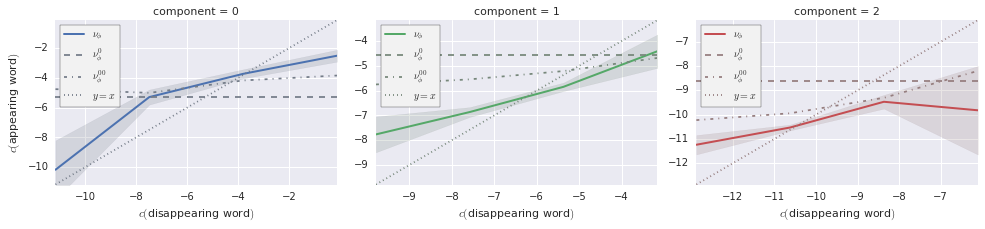

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1002 (cluster-unique) substitutions, but the PCA is in fact computed on 460 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.